#   PREDICITING HEART ATTACKS - MACHINE LEARNING PROJECT

Authors: Jan K Bober Irizar, Oscar Maso

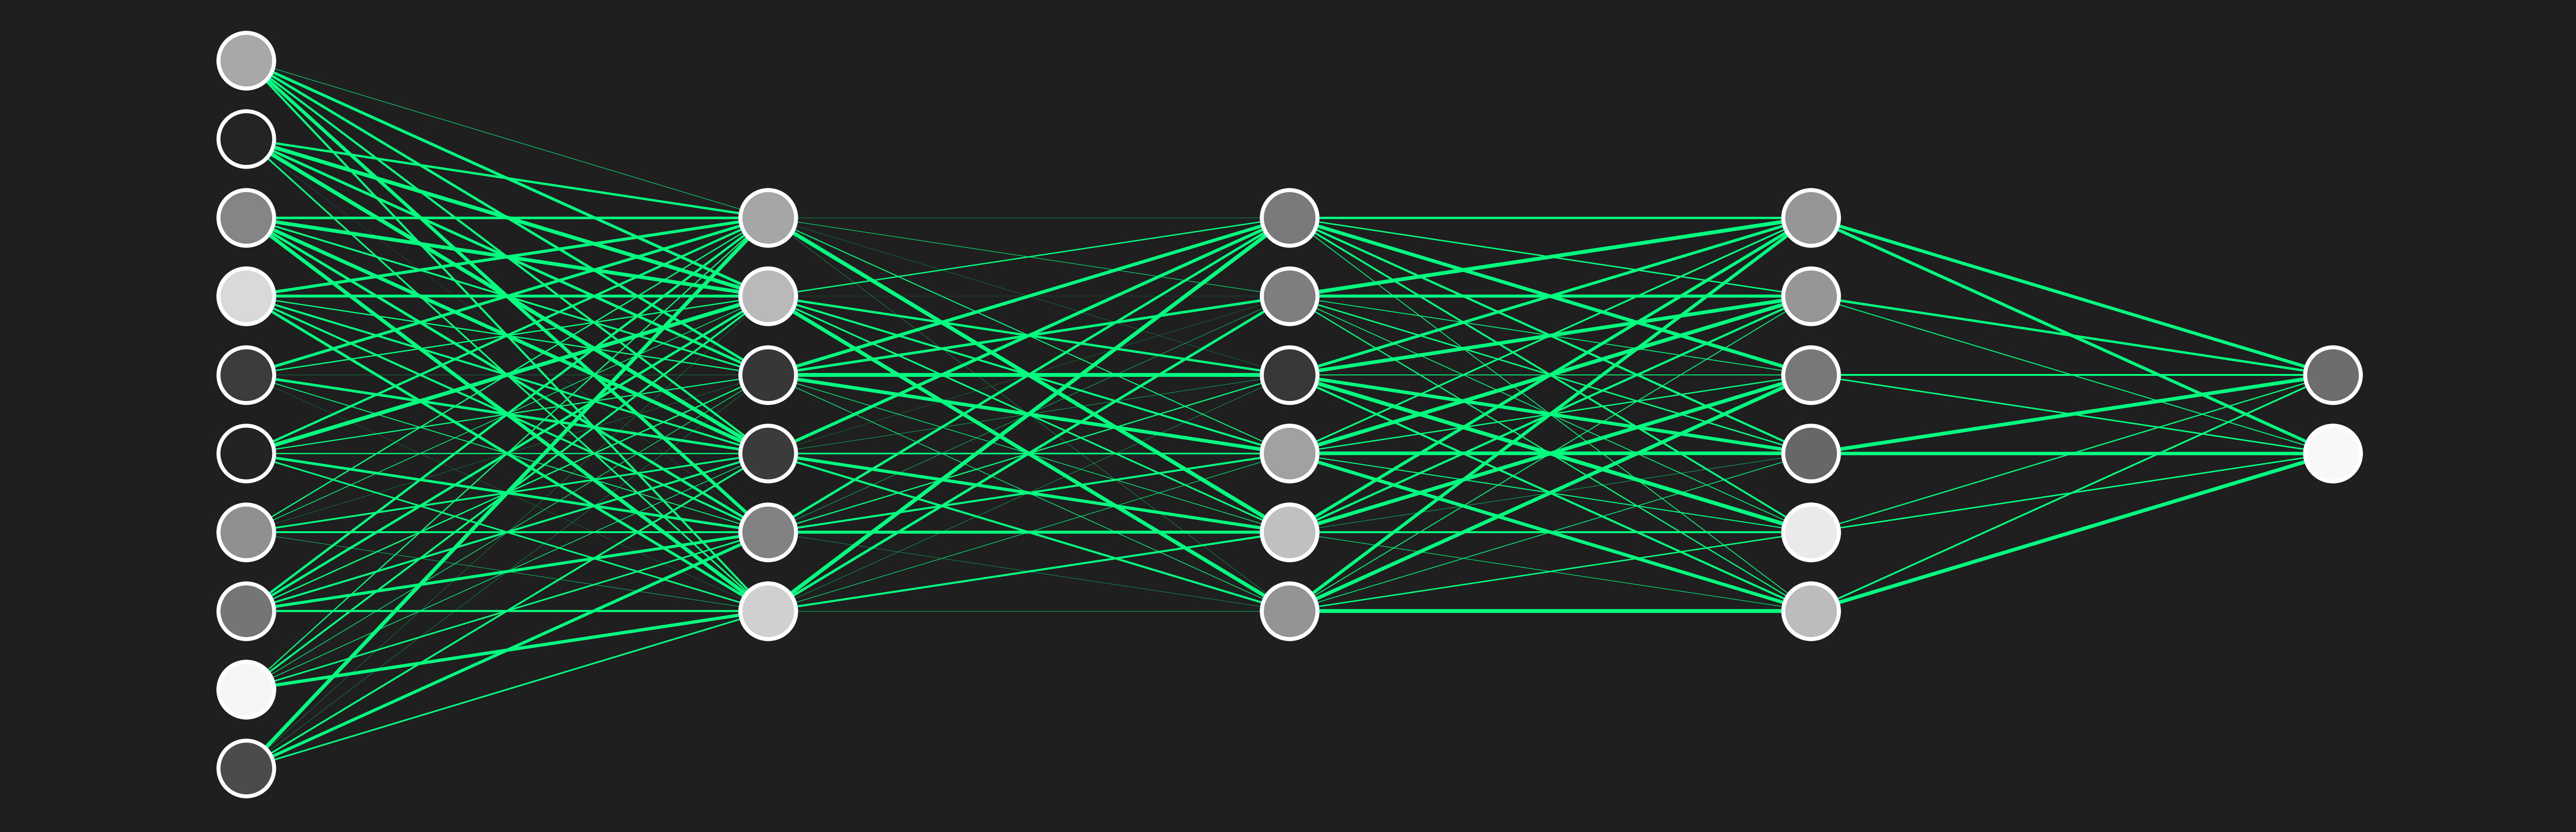

<br><br>

## 1.. Introduction

---



---






The objective of this project is to identify significant coronary artery narrowing (a serious risk factor for heart attacks) using patient demographics and various clinical information.



### 1.1 What is Heart Disease?

Heart diseases, also known as cardiovascular diseases, encompass a group of medical conditions that affect the heart and blood vessels. These conditions can include coronary artery disease, heart failure, arrhythmias (irregular heartbeats), and valvular heart diseases. Athlerosclerosis is the most common type of heart disease. It is often caused by factors like high blood pressure, high cholesterol, smoking, obesity, diabetes, and family history. Prevention involves adopting a healthy lifestyle with a balanced diet, regular exercise, and managing risk factors.

A heart attack, or myocardial infarction, is a critical event caused by heart disease. It occurs when the blood flow to a part of the heart muscle is severely reduced or blocked, usually due to a clot forming in a narrowed coronary artery. This blockage deprives the heart of oxygen and can lead to chest pain or discomfort, known as angina, or more severe symptoms, such as shortness of breath and intense chest pain. A heart attack requires immediate medical attention to restore blood flow and prevent heart muscle damage. Early intervention is crucial to minimize the impact of a heart attack and increase the chances of survival.



### 1.2 How do we detect a Heart Attack?

A heart attack, also known as a myocardial infarction, is typically diagnosed and measured using a combination of medical tests and clinical evaluation. Here are the main methods used to measure and diagnose a heart attack:

1.- Electrocardiogram (ECG or EKG): An ECG measures the electrical activity of the heart. Specific patterns, such as ST-segment elevation or depression, can indicate a heart attack. ECG is quick and often the first test performed in case of suspected heart attack.

2.- Blood Tests (Cardiac Biomarkers): Blood tests, specifically cardiac biomarkers like troponin, are crucial for diagnosing a heart attack. Troponin is released into the bloodstream when heart muscle cells are damaged. Elevated troponin levels in the blood indicate heart muscle damage and are a strong indicator of a heart attack.

3.- Imaging Tests (Echocardiogram): An echocardiogram is an ultrasound of the heart. It provides real-time images of the heart's structure and function. During a heart attack, certain parts of the heart may not contract properly, and an echocardiogram can detect these abnormalities, helping in the diagnosis.

4.- Clinical Evaluation and Symptoms: A patient's symptoms, particularly chest pain or discomfort, along with their medical history and risk factors, are critical in diagnosing a heart attack. Doctors often assess the nature, duration, and intensity of chest pain, as well as other associated symptoms such as shortness of breath, nausea, or sweating. Clinical evaluation helps in making an initial assessment and deciding on further diagnostic tests.

These four methods—ECG, blood tests (cardiac biomarkers), echocardiogram, and clinical evaluation—provide a comprehensive approach to diagnose a heart attack. Combining these methods helps healthcare professionals accurately determine whether a person has experienced a heart attack and plan appropriate treatment.

### 1.3 Where is the Dataset from?


The Heart Attack Analysis & Prediction Dataset, available from UCI: Irvine, is a valuable resource for researchers and healthcare professionals interested in understanding and predicting the risk of heart attacks. This dataset provides a rich source of information, allowing for in-depth analysis of various factors contributing to the occurrence of heart attacks, facilitating the development of predictive models and interventions.

1. **Data Diversity**: The dataset encompasses a diverse group of individuals, making it useful for studying heart attack risk across different demographics. Researchers can explore how risk factors vary among different age groups, genders, and other categories.

2. **Machine Learning Applications**: The Heart Attack Analysis & Prediction Dataset is frequently employed for machine learning applications. Researchers can develop classification models to predict the likelihood of heart attacks based on the available data. This is crucial for early intervention and personalized treatment plans

3. **Data Privacy**: Like any healthcare-related dataset, ethical considerations and data privacy are of utmost importance. Researchers should follow strict ethical guidelines and ensure that the data is used responsibly, protecting the privacy and confidentiality of individuals in the dataset.

4. **Research Applications**: This dataset has been utilized in numerous research studies to investigate factors contributing to heart attacks and develop predictive models for early detection. Studies often focus on identifying the most influential risk factors and understanding how they interplay in the context of heart attack prediction.

In summary, the Heart Attack Analysis & Prediction Dataset from UCI: Irvine is a valuable tool for healthcare professionals and researchers aiming to enhance our understanding of heart attack risk factors and develop predictive models to identify individuals at higher risk. Its comprehensive nature, diverse data, and machine learning applications make it a significant resource for advancing cardiovascular health research and patient care.

### 1.4 What is our Aim?

Our primary aim in predicting heart attacks using this dataset is to build an accurate predictive model that can assess an individual's risk of experiencing a heart attack. This involves identifying significant risk factors. The model's performance must be rigorously evaluated, and insights provided to healthcare professionals for clinical decision support and patient education.



<br><br>
<br><br>
## 2.. Data Preparation

---



---







### 2.1 Dataset Overview

---


Before importing the dataset, it is necessary to specify the libraries/packages that we will be using throughout this project. The most basic ones are the following:

  * Pandas: For creation of dataframes and correct representation of data.
  * Numpy: For mathematical operations and numerical array definition.
  * Seaborn: For plotting in a more comprehensible and attractive manner than just using the matplotlib library.

In [ ]:
# Ignore warnings.
import warnings
warnings.filterwarnings("ignore")

# Introducing basic Python libraries essential to the analysis of the dataset.
import pandas as pd
import numpy as np
import time
import random
random.seed(100)

#Visualisation libraries
#!pip install itertools
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import itertools

#Location libraries
#!pip install folium
#!pip install branca
import folium
import branca
from branca.colormap import linear
from geopy.geocoders import Nominatim

#Statistical libraries
!pip install tensorflow
!pip install statsmodels pandas
!pip install prince
!pip install gower
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import prince
import scipy.stats as stats
from scipy.stats import ranksums
from scipy.stats import shapiro
from scipy.stats import pointbiserialr
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
import gower
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Introducing the path of the folder in which our project will be developed.
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Trabajo MachineLearning/archive/heart.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br><br>
Once the basic libraries are imported, we will use pandas capabilities to read the csv file where our data is located. The format of the dataframe is shown below.

In [ ]:
# Showing the first few rows for reference
df = pd.read_csv(file_path)
df = df[['age', 'sex', 'trtbps','chol', 'fbs', 'cp', 'restecg', 'caa', 'thalachh', 'exng', 'slp', 'oldpeak', 'thall', 'output']]

# Creating a dictionary where keys are old names and values are new names
new_column_names = {
    'age': 'age',
    'sex': 'sex',
    'trtbps': 'blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_glucose',
    'cp': 'angina_rest',
    'restecg': 'ecg_rest',
    'caa': 'coronary_lesions',
    'thalachh': 'max_heartrate',
    'exng': 'angina_exercise',
    'slp': 'ecgslope_exercise',
    'oldpeak': 'ecgdep_exercise',
    'thall': 'tracer_exercise',
    'output': 'output'
}

# Renaming the columns
df.rename(columns=new_column_names, inplace=True)

#Reverse order to align with increasing severity
df['angina_rest'] = 3 - df['angina_rest']

# Display the first few rows of the updated DataFrame
df.head()


,age,sex,blood_pressure,cholesterol,fasting_glucose,angina_rest,ecg_rest,coronary_lesions,max_heartrate,angina_exercise,ecgslope_exercise,ecgdep_exercise,tracer_exercise,output
0,63,1,145,233,1,0,0,0,150,0,0,2.3,1,1
1,37,1,130,250,0,1,1,0,187,0,0,3.5,2,1
2,41,0,130,204,0,2,0,0,172,0,2,1.4,2,1
3,56,1,120,236,0,2,1,0,178,0,2,0.8,2,1
4,57,0,120,354,0,3,1,0,163,1,2,0.6,2,1


We have altered the feature names and order to be more comprehensible. Also we have reordered angine_rest to be in order of increasing severity.

<br><br>
#### **Variables**

##### **Patient Demographics**
- **Age:** Age of the patient.
- **Sex:** Gender of the patient.
  - 1 = Male
  - 0 = Female
<br><br>

##### **Baseline Clinical Information**
- **Resting Blood Pressure (blood_pressure):** Blood pressure of the patient at rest (on admission to the hospital), measured in mm Hg.
- **Total Cholesterol (cholesterol):** in mg/dl.
- **Fasting Glucose (fasting_glucose):** in mg/dl.
  - 1 = >120 mg/dl
  - 0 = <120 mg/dl
- **Chest Pain Type (angina_rest):** Type of chest pain experienced by the patient.
  - 3 = Asymptomatic
  - 2 = Non-anginal Pain
  - 1 = Atypical Angina
  - 0 = Typical Angina
- **Resting ECG Results (ecg_rest):** Outcome of resting electrocardiographic test.
  - 2 = Left ventricular hypertrophy
  - 1 = ST-T wave normality
  - 0 = Normal

- **Lesioned Coronary Vessels (coronary_lesions):** Number of coronary arteries (out of the three major ones: Left Main Coronary Artery (LMCA), Left Anterior, Descending (LAD) Artery,
Left Circumflex (LCx) Artery) displaying athlerosclerotic lesions using fluorscopy angiogram.
  - 3 = All three vessels
  - 2
  - 1
  - 0 = No vessels
<br><br>


##### **Exercise Stress Test**
- **Maximum Heart Rate (max_heartrate):** Measured during exercise.
- **Exercise-Induced Angina (angina_exercise):** Reported chest pain during exercise.
  - 1 = Yes
  - 0 = No
- **Exercise-Induced ST-slope (ecgslope_exercise):** ST segment angle measured by ECG
  - 2 = Downsloping  
  - 1 = Flat       
  - 0 = Upsloping (no ischemia)
- **Exercise-Induced ST-depression (ecgdep_exercise):** ST depression relative to rest measured by ECG (potentially inadequate blood flow to heart).
  - 1 = Yes
  - 0 = No (no ischemia)
- **Exercise-Induced Ischemia (tracer_exercise):** Coronary blood flow reduction as measured with radioactive isotope Thalium-81.
  - 3 = Reversable defect
  - 2 = Normal
  - 1 = Fixed defect
  - 0 = Null
<br><br>



##### **Outcome Variable**
- **Significant Narrowing (output):** Greater than 50% narrowing in at least 1 coronary vessel using fluorscopy angiogram.
  - 1 = Yes
  - 0 = No




We have 14 features containing basic demographics, serum biomarkers, electrocardiogram (ECG), fluoroscopic angiography and nuclear stess test.
Testing was performed at rest and under exercise stress.

We predict that features derived from more invasive testing such as "Exercise-Induced Ischemia" and "Lesioned Coronary Arteries" will be more predictive of our ourcome variable "Significant Narrowing". In fact, the last two features are derived from the same test.

Naturally, this raises the question of why this ourcome variable was selected since in fluoroscopic angiography all vessels are imaged, not only the 3 largest ones.

<br><br>

#### Attributes
This section will provide an initial overview of the dataset, including the number of rows and columns, data types, and a few sample rows.


We will start by analyzing the shape and type of variables/features our dataset has:

In [ ]:
n, m = df.shape

print(f"This dataset has {n} observations, each with {m} features")

This dataset has 303 observations, each with 14 features


In [ ]:
print(df.dtypes)

age                    int64
sex                    int64
blood_pressure         int64
cholesterol            int64
fasting_glucose        int64
angina_rest            int64
ecg_rest               int64
coronary_lesions       int64
max_heartrate          int64
angina_exercise        int64
ecgslope_exercise      int64
ecgdep_exercise      float64
tracer_exercise        int64
output                 int64
dtype: object


As expected, all column types are numeric.
Let's check if the range of each variable is reasonable.

In [ ]:
df.describe()

,age,sex,blood_pressure,cholesterol,fasting_glucose,angina_rest,ecg_rest,coronary_lesions,max_heartrate,angina_exercise,ecgslope_exercise,ecgdep_exercise,tracer_exercise,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,2.033003,0.528053,0.729373,149.646865,0.326733,1.399340,1.039604,2.313531,0.544554
std,9.082101,0.466011,17.538143,51.830751,0.356198,1.032052,0.525860,1.022606,22.905161,0.469794,0.616226,1.161075,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,1.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,2.000000,1.000000,0.000000,153.000000,0.000000,1.000000,0.800000,2.000000,1.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,3.000000,1.000000,1.000000,166.000000,1.000000,2.000000,1.600000,3.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,3.000000,2.000000,4.000000,202.000000,1.000000,2.000000,6.200000,3.000000,1.000000


All binary or categorically encoded features (e.g sex, angina, fasting_glucose...) do indeed include values in previously stated range. All other variables are within the clinically possible range (e.g. max heart rate 71-202).

<br><br>
### 2.2 Data Cleaning

---

This step ensures the veracity of our data suffices for future analysis, while minimising the loss of data incurred. This is important to maintain the power and creativity of our analysis.

When cleaning a dataset there are 3 general approaches to dealing with data errors, in order of preference:

1. Replacing the incorrect cell with an accurate estimate where possible
2. Replacing the incorrect cell with NAs and ignoring them for analysis where possible
3. Removing the entire row containing an incorrect cell. If we have so many suspected NAs that the row is useless we might as well delete it

Now we will address any missing records, incorrect data types, duplicates and outlier values.

We begin by searching for NA values as well as null values.

In [ ]:
# First we will count the number of NA values present in our data set.
print("Number of NAs per column is:\n", df.isna().sum())

# Then we check if there are any null values
print("\n\n Number of nulls per column is:\n", df.isnull().sum())

#Checking number of -1s
count_minus_one_per_column = (df == -1).sum()
print("Count of -1 values per column:")
print(count_minus_one_per_column)


Number of NAs per column is:
 age                  0
sex                  0
blood_pressure       0
cholesterol          0
fasting_glucose      0
angina_rest          0
ecg_rest             0
coronary_lesions     0
max_heartrate        0
angina_exercise      0
ecgslope_exercise    0
ecgdep_exercise      0
tracer_exercise      0
output               0
dtype: int64


 Number of nulls per column is:
 age                  0
sex                  0
blood_pressure       0
cholesterol          0
fasting_glucose      0
angina_rest          0
ecg_rest             0
coronary_lesions     0
max_heartrate        0
angina_exercise      0
ecgslope_exercise    0
ecgdep_exercise      0
tracer_exercise      0
output               0
dtype: int64
Count of -1 values per column:
age                  0
sex                  0
blood_pressure       0
cholesterol          0
fasting_glucose      0
angina_rest          0
ecg_rest             0
coronary_lesions     0
max_heartrate        0
angina_exercise      0
ecgs

As we can see, there are no NA or null values. Later we will check if there are other inappropriate values of another type.

Lets check if there are any duplicates.

In [ ]:
print("Number of duplicated values was \n:", sum(df.duplicated()))
df = df.drop_duplicates()
print("Number of duplicated values is \n:", sum(df.duplicated()))

Number of duplicated values was 
: 1
Number of duplicated values is 
: 0


As we can see, no duplicates remain.

Since we know that all values are numeric and that the range of values is correct, we know that the data is now clean.

For the sake of completness, lets print the number of unique values for each feature.

In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
blood_pressure,49
cholesterol,152
fasting_glucose,2
angina_rest,4
ecg_rest,3
coronary_lesions,5
max_heartrate,91
angina_exercise,2


Thus, after completely cleaning the dataset we will be working with, it's dimensions are the following:

In [ ]:
df.shape

(302, 14)

<br><br>
<br><br>
## 3.. Data Analysis

---



---



### 3.1 Descriptive Statistics

---



We will begin the numerical analysis of the dataset by showing the statistical characteristics of each feature distribution, these being: Mean, standard deviation and maximum values among others.

In [ ]:
df.describe()

,age,sex,blood_pressure,cholesterol,fasting_glucose,angina_rest,ecg_rest,coronary_lesions,max_heartrate,angina_exercise,ecgslope_exercise,ecgdep_exercise,tracer_exercise,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,131.602649,246.500000,0.149007,2.036424,0.526490,0.718543,149.569536,0.327815,1.397351,1.043046,2.314570,0.543046
std,9.04797,0.466426,17.563394,51.753489,0.356686,1.032044,0.526027,1.006748,22.903527,0.470196,0.616274,1.161452,0.613026,0.498970
min,29.00000,0.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,120.000000,211.000000,0.000000,1.000000,0.000000,0.000000,133.250000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,130.000000,240.500000,0.000000,2.000000,1.000000,0.000000,152.500000,0.000000,1.000000,0.800000,2.000000,1.000000
75%,61.00000,1.000000,140.000000,274.750000,0.000000,3.000000,1.000000,1.000000,166.000000,1.000000,2.000000,1.600000,3.000000,1.000000
max,77.00000,1.000000,200.000000,564.000000,1.000000,3.000000,2.000000,4.000000,202.000000,1.000000,2.000000,6.200000,3.000000,1.000000


<br><br>
###3.2 Data Visualization

---


In this section, we will be focusing on the creation of visualizations such as histograms, scatter plots, box plots and so on to explore data distributions and trends in our data.


#### Correlation between Features

First, we will will begin by testing for linear correlations between our features. This is important for later, as for some models colinearity may affect their performance/interpretability.

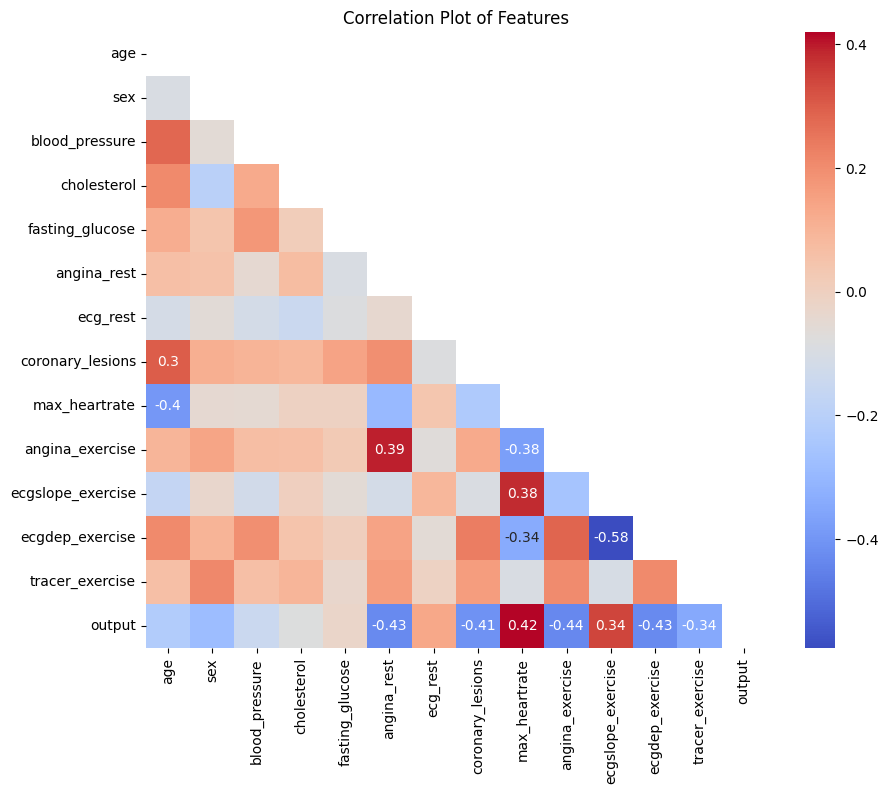

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Create a mask to only show the lower triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create an annot array that matches the shape of the corr matrix
# and contains the correlation values where they are above 0.25
annot = np.where(corr.abs() > 0.3, corr.round(2).astype(str), "")

# Create the heatmap using seaborn with the adjusted annotations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=annot, fmt='', cmap='coolwarm')
plt.title("Correlation Plot of Features")
plt.show()

We can observe that the following features display at least moderate colinearity (r>0.3): age-max_heartrate, age-coronary_lesions, angina_rest-output, angina_rest-angina_exercise, coronary_lesions-output among others.

Some relationships such as angina at rest and during exercise are fairly obvious.

<br><br>
#### Density Plot of Features

First, we will start by visualizing the distribution of each numerical field. We will also drop, for this case, the binary variables, as their plot consist in just two bins.

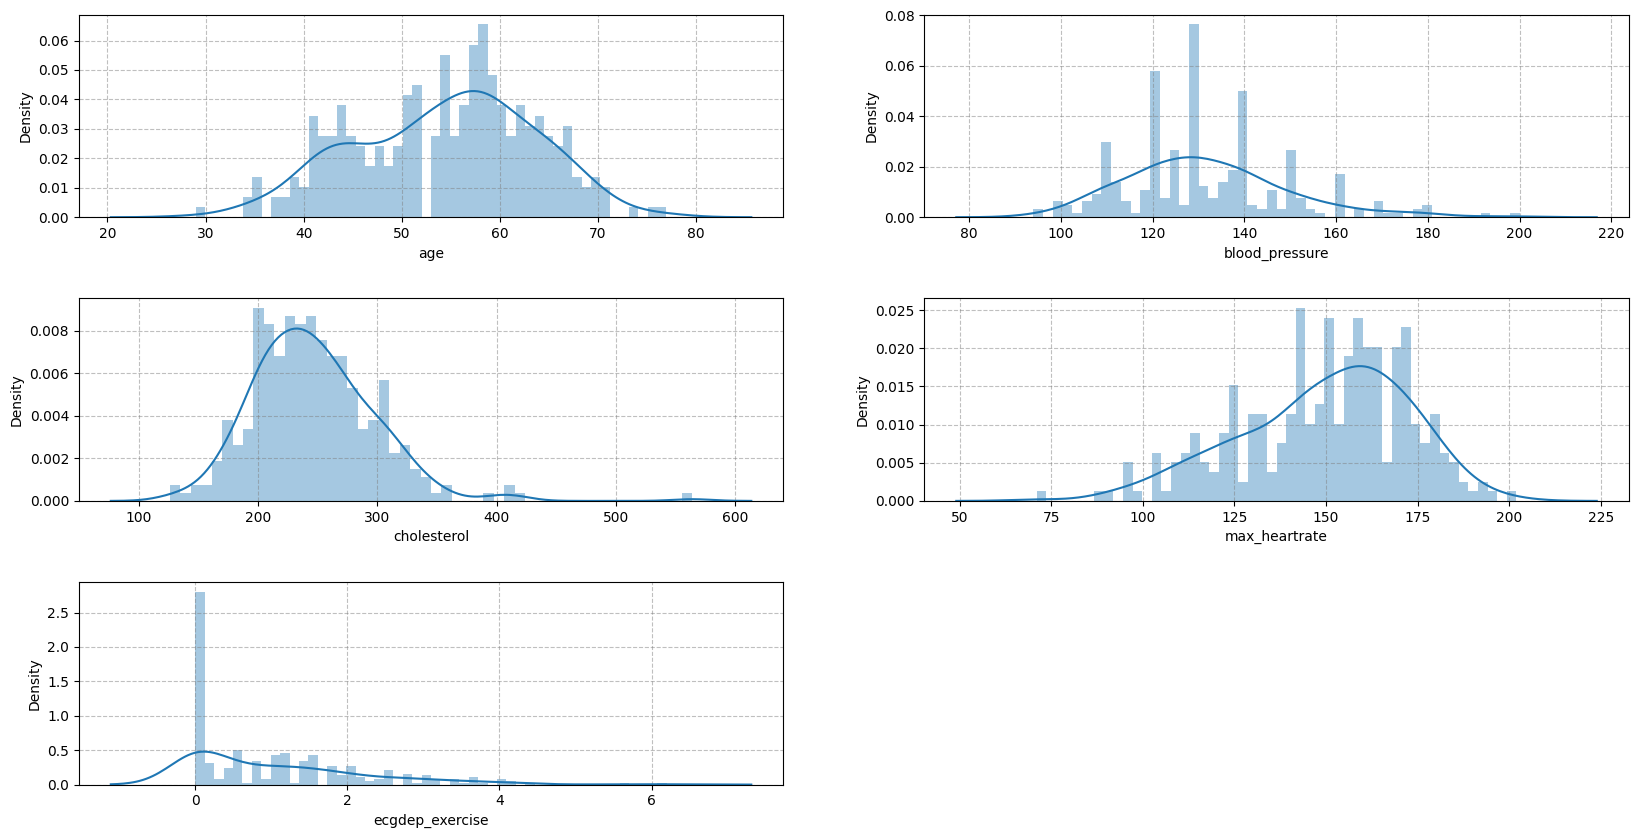

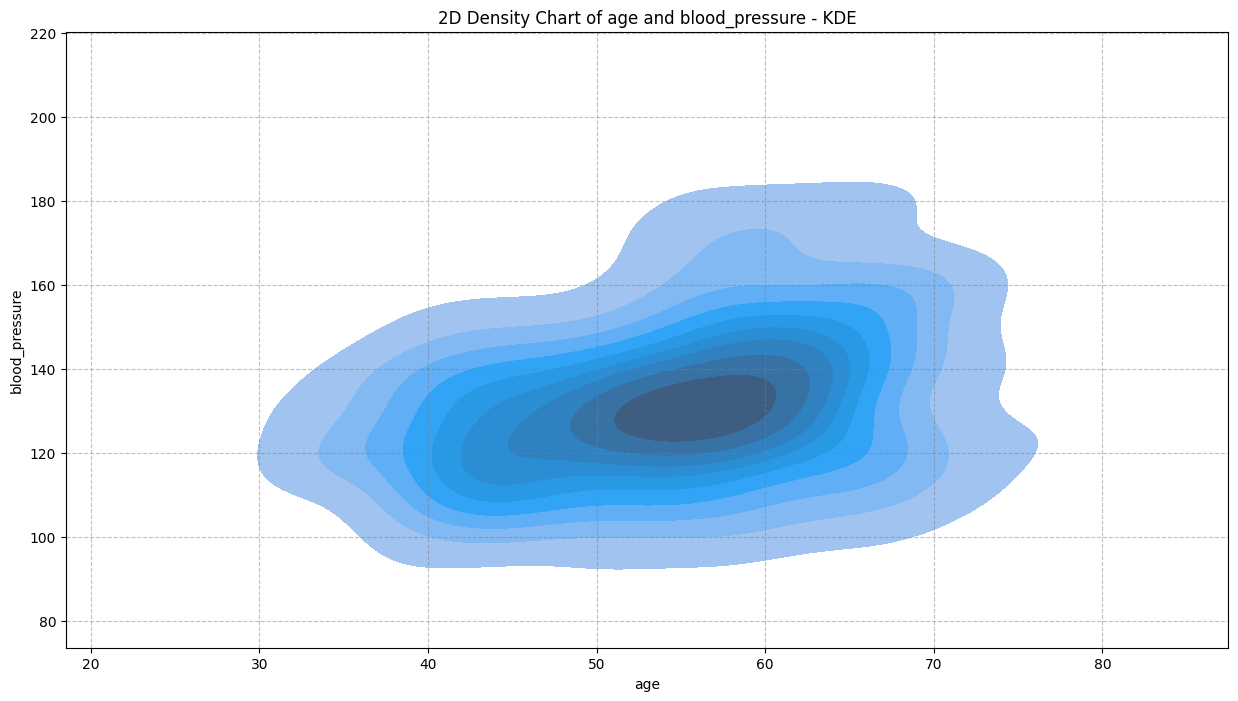

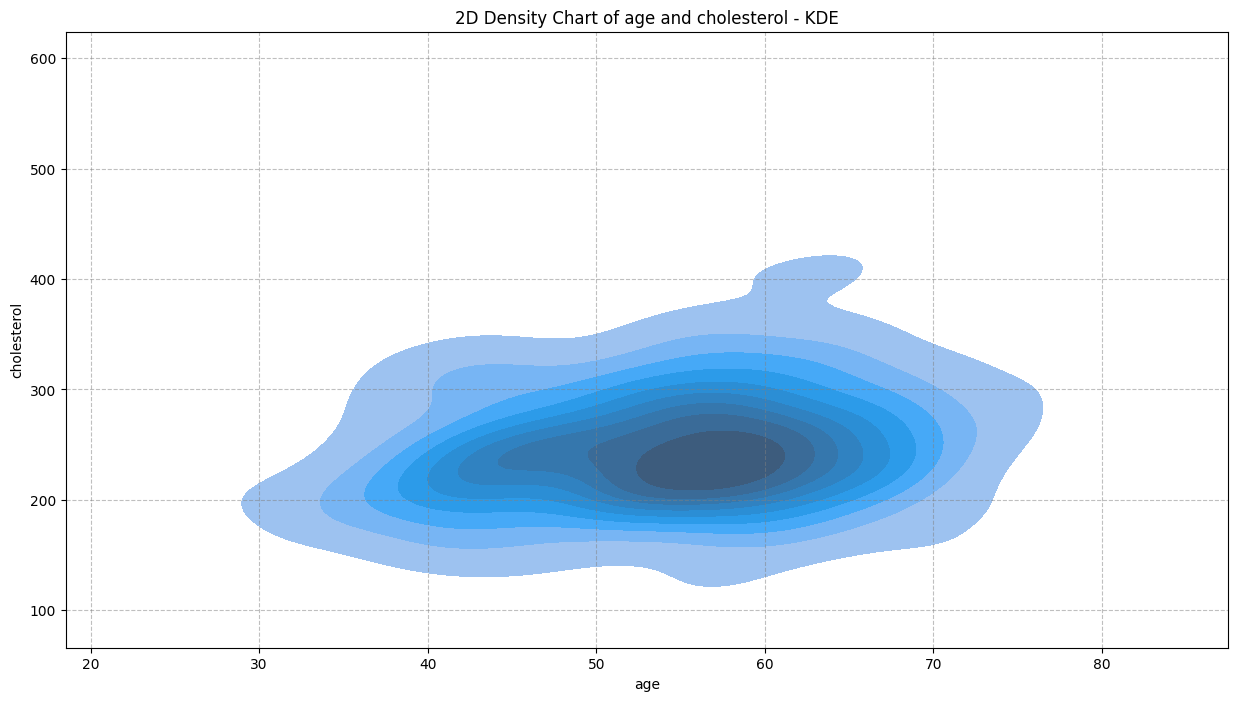

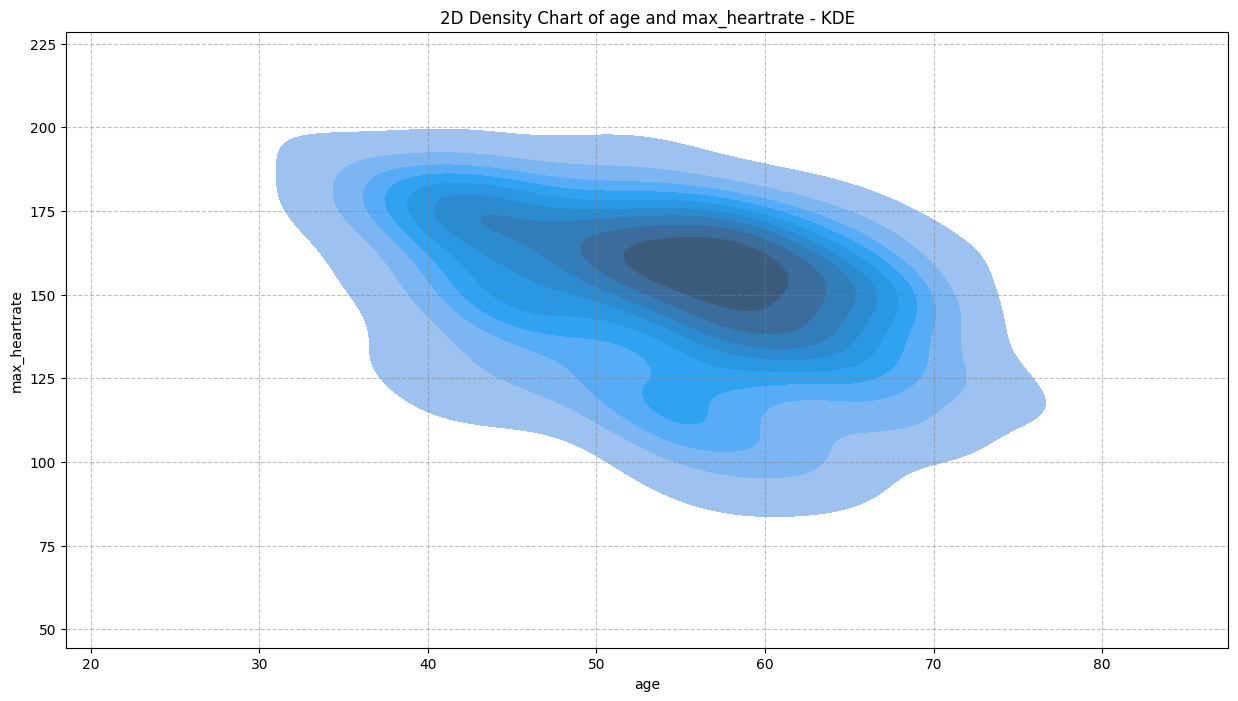

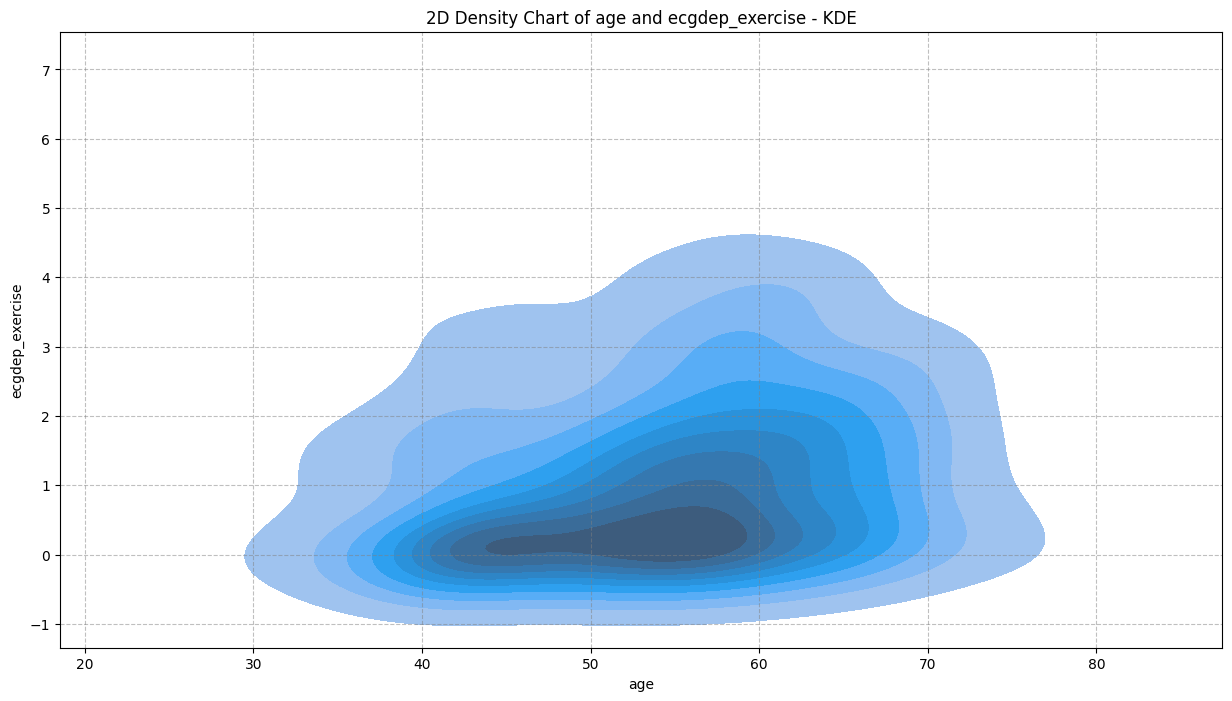

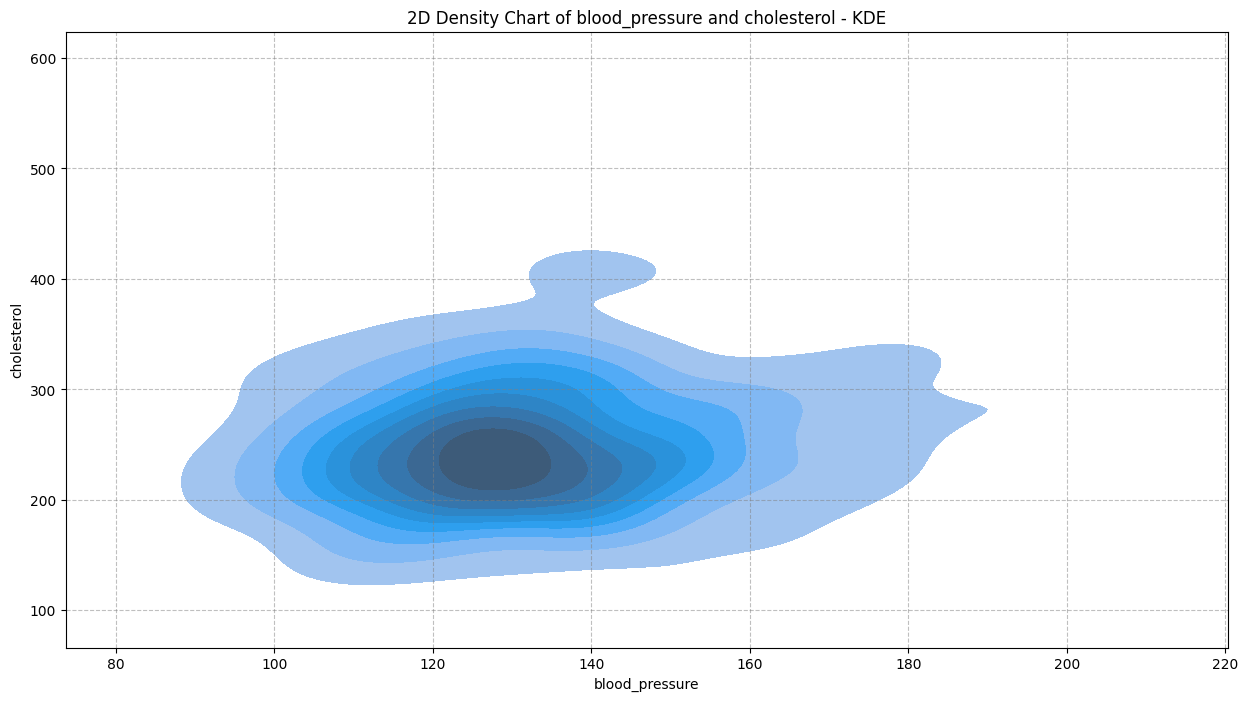

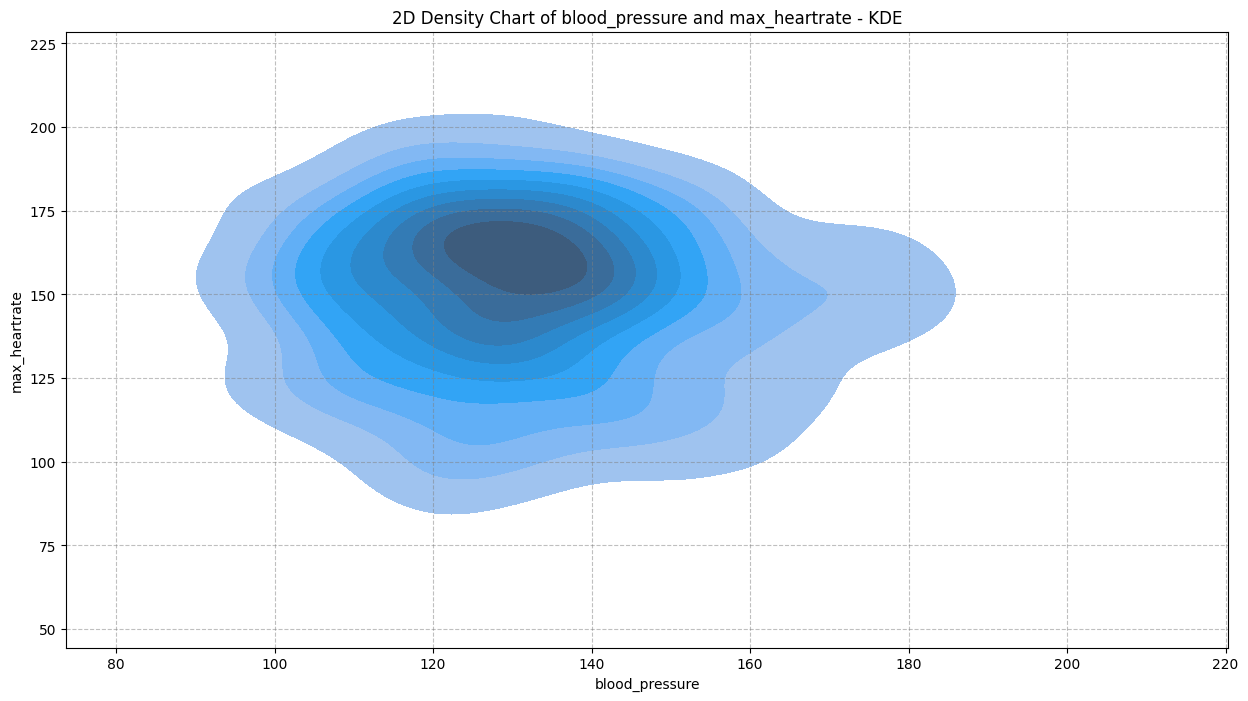

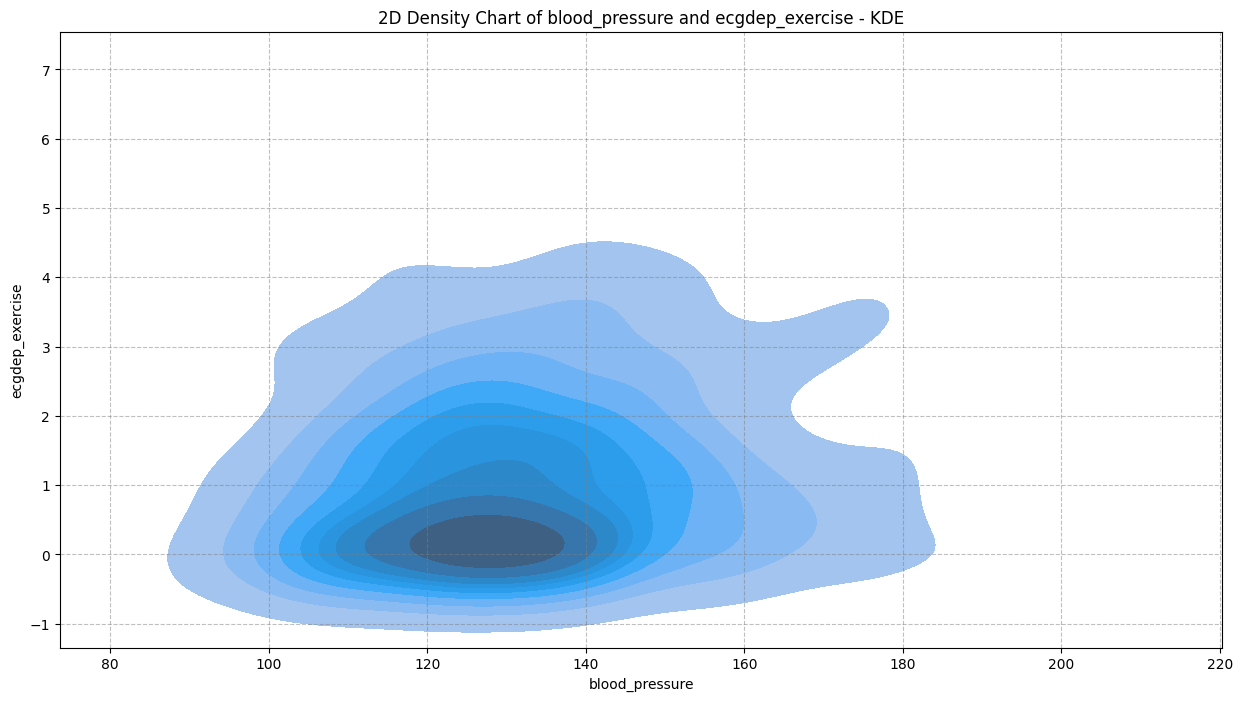

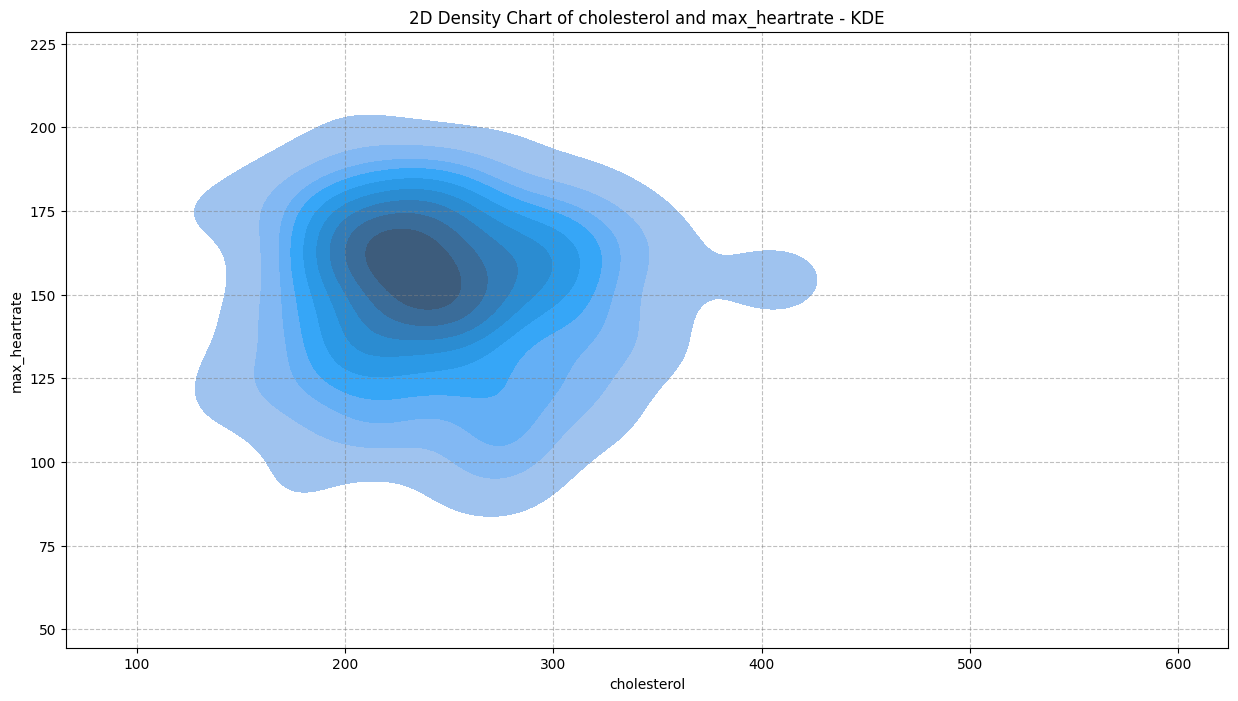

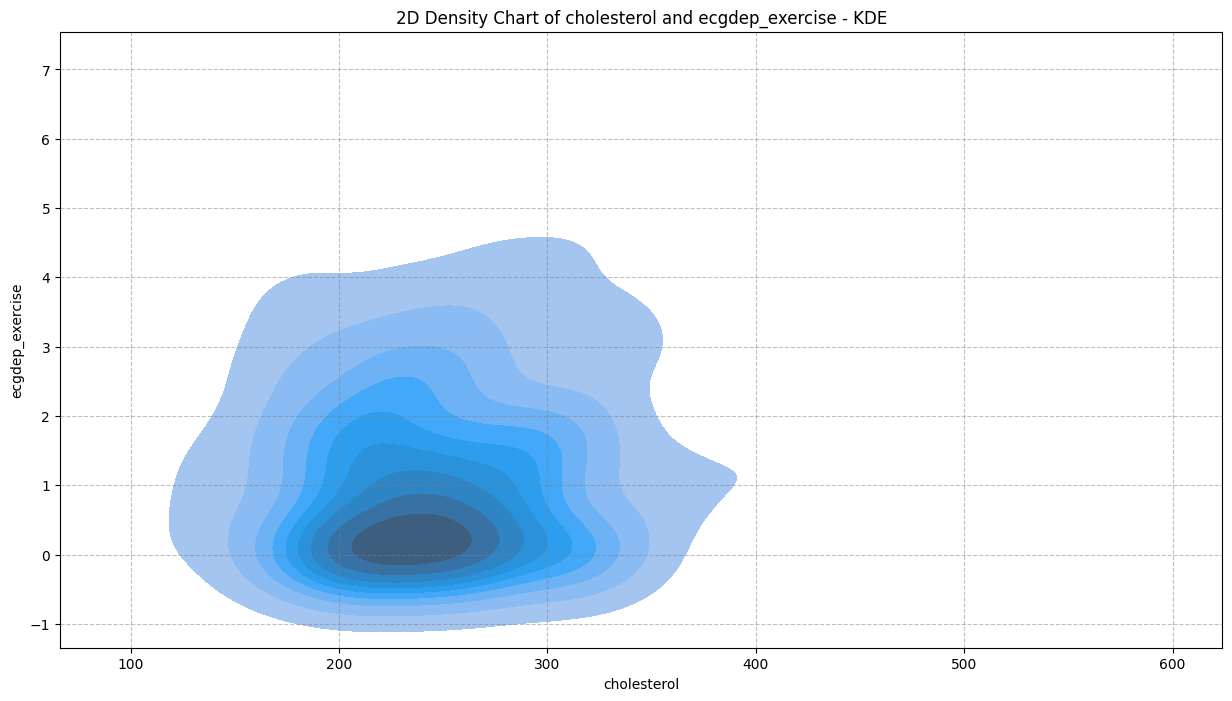

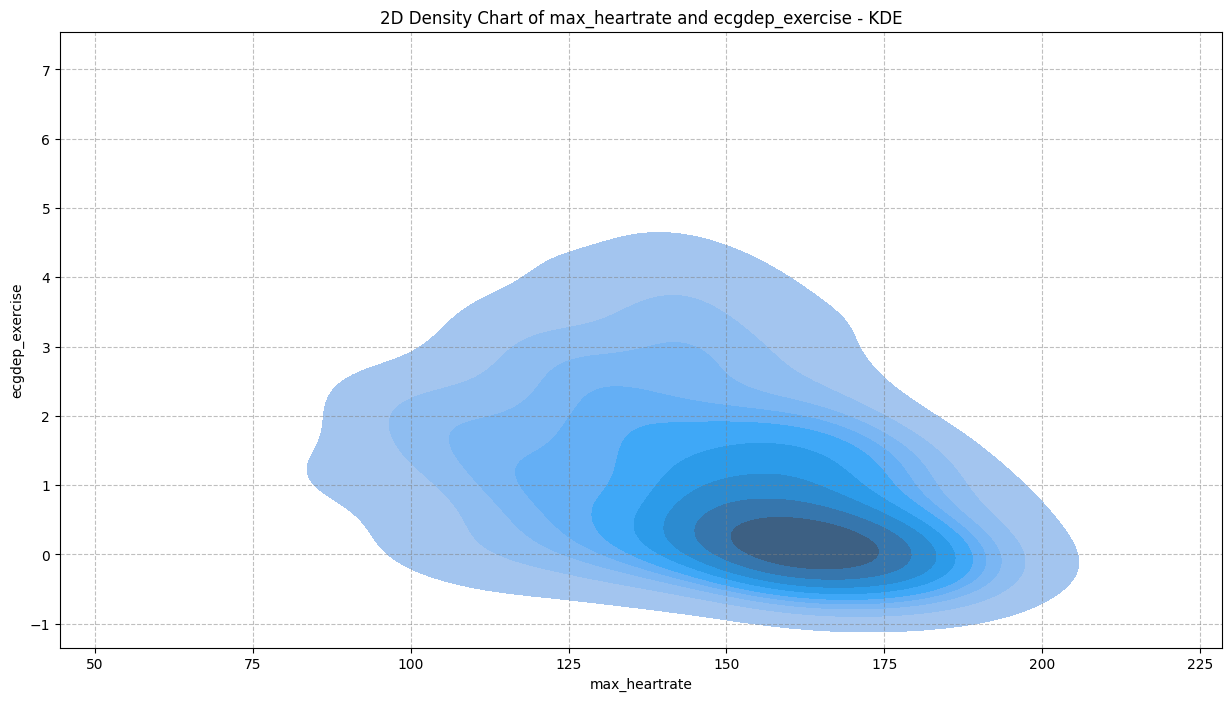

In [ ]:
# Choosing only the numerical fields in the dataframe df.
df_num = df.select_dtypes(include=[np.number])

# Non-binary fields in the dataframe df.
nonBinaryColumns = ['age', 'blood_pressure', 'cholesterol', 'max_heartrate', 'ecgdep_exercise']

# Selecting only the non-binary variables of the dataframe.
df_non_binary2 = df_num[nonBinaryColumns]

# Distribution plot of the non-binary variables.
cont = 1
plt.figure(figsize=(20, 10))
plt.title("Distribution of Non-binary Features")
for i in nonBinaryColumns:
    plt.subplot(3, 2, cont)
    sns.distplot(df_num[i], bins = 50)
    plt.grid(color='grey', linestyle='dashed', alpha=0.5)
    cont += 1
plt.subplots_adjust(hspace=0.4)
plt.show()

# 2D Density Chart for combinations of non-binary variables.
pairs = [(nonBinaryColumns[i], nonBinaryColumns[j]) for i in range(len(nonBinaryColumns)) for j in range(i+1, len(nonBinaryColumns))]

for pair in pairs:
    plt.figure(figsize=(15, 8))
    sns.kdeplot(data=df_num, x=pair[0], y=pair[1], fill=True)
    plt.title(f"2D Density Chart of {pair[0]} and {pair[1]} - KDE")
    plt.grid(color='grey', linestyle='dashed', alpha=0.5)
    plt.show()


As expected, most categorical variables display a roughly normal behaviour albeit with extended tails in some cases. The last graph displays that as bloodflow to the heart decreases, the max heart rate also decreases.

<br><br>
#### Violinplot of Continious Features
The next plot shows the distribution of our continious variables as a function of output (doesnt seem to be working at the moment).

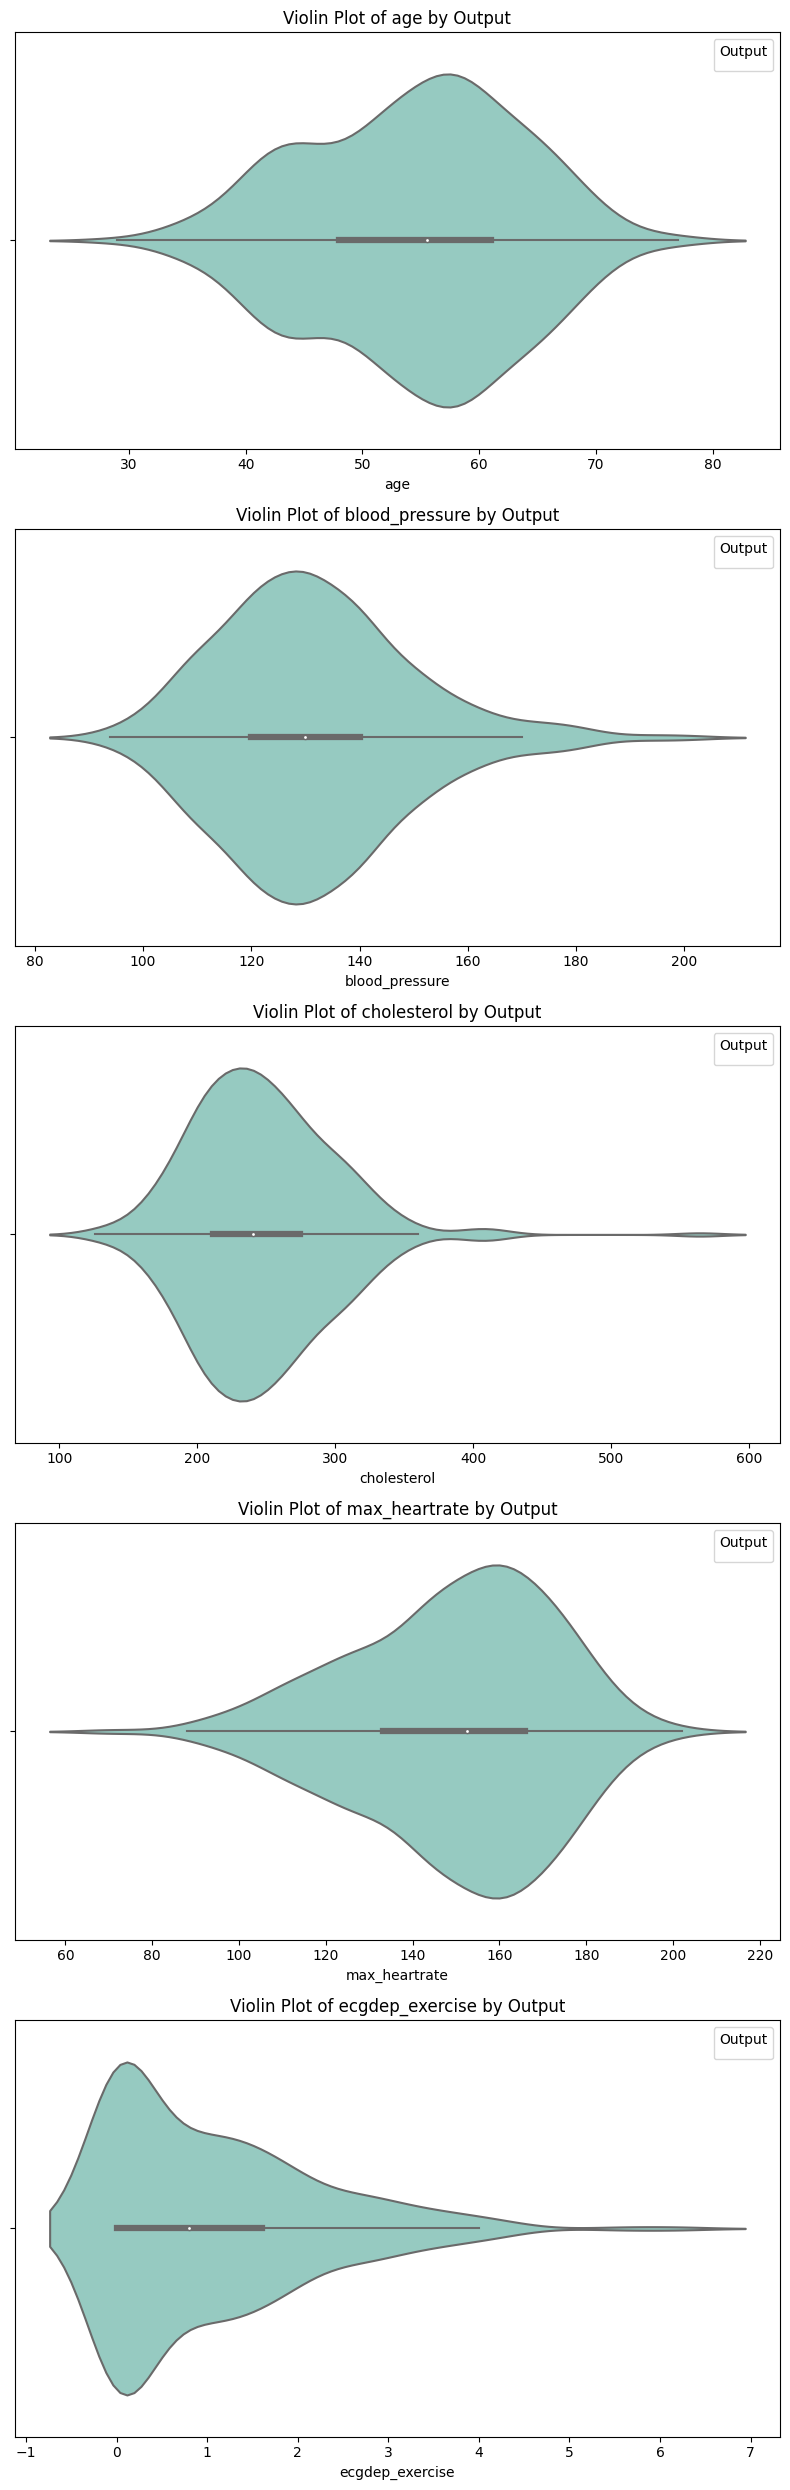

In [ ]:
# Plotting violin plots for each continuous variable
continuous_vars = ['age', 'blood_pressure', 'cholesterol', 'max_heartrate', 'ecgdep_exercise']

# Set up the matplotlib figure
fig, axes = plt.subplots(len(continuous_vars), 1, figsize=(8, 5 * len(continuous_vars)))

for i, var in enumerate(continuous_vars):
    sns.violinplot(ax=axes[i], x=var, data=df, split=True, palette='Set3')
    axes[i].set_title(f'Violin Plot of {var} by Output')
    axes[i].set_xlabel(var)
    axes[i].legend(title='Output')

plt.tight_layout()
plt.show()

If we were able to plot the mediating impact of "output" on each of these variables we could make some interesting conclusions. Otherwise the distribution is the same as that in the section above.

<br><br>
#### Barplot of Categorical Features

Now we will look at the categorical variables and their distributions.

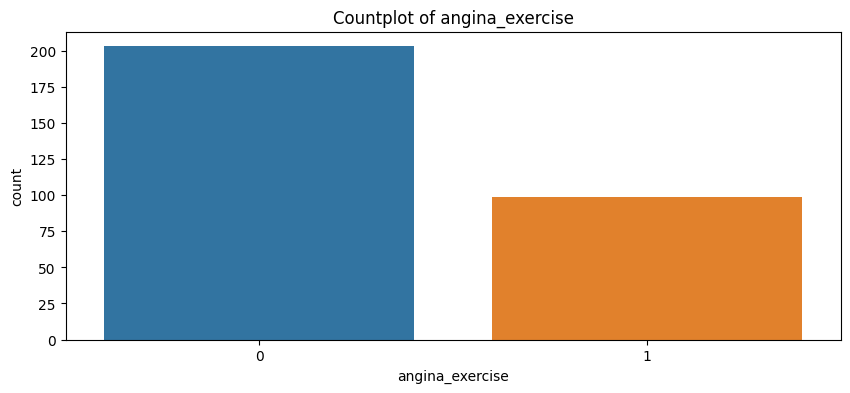

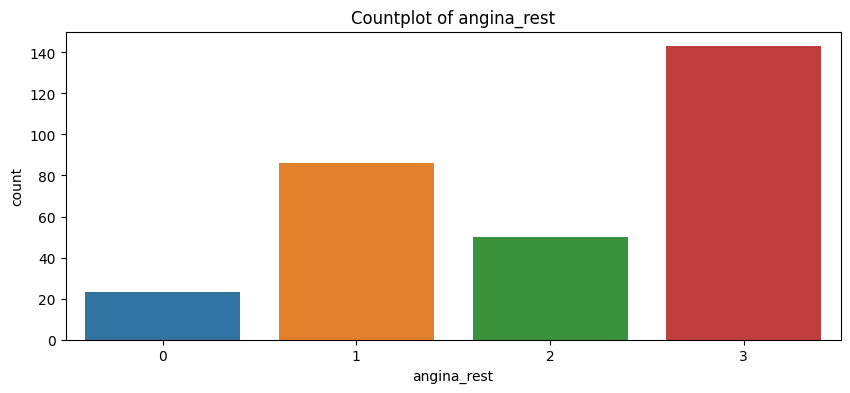

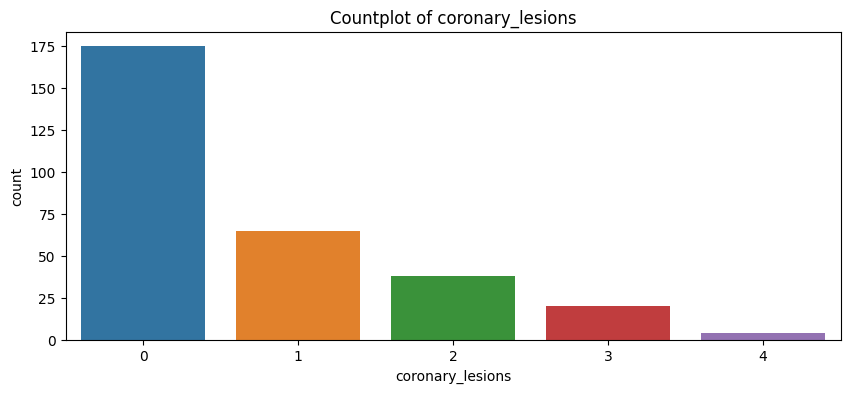

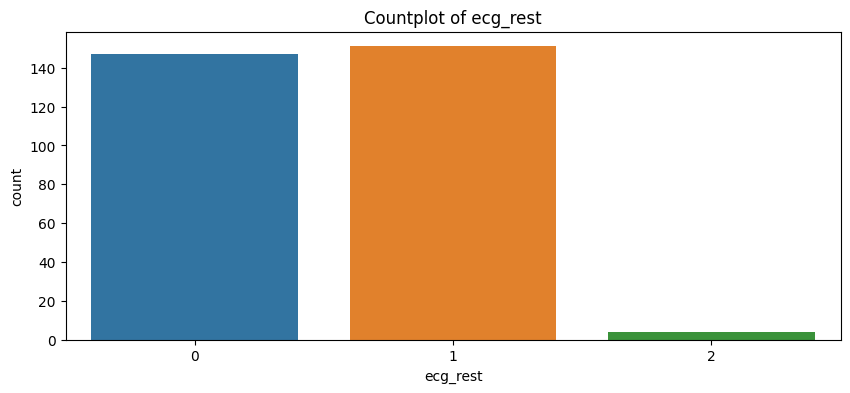

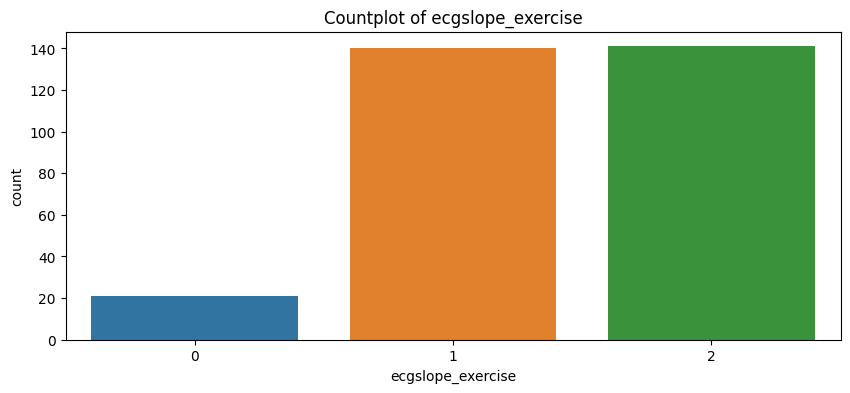

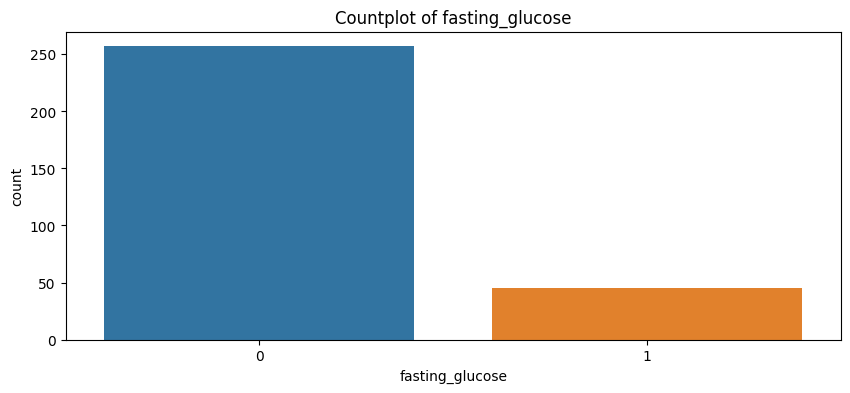

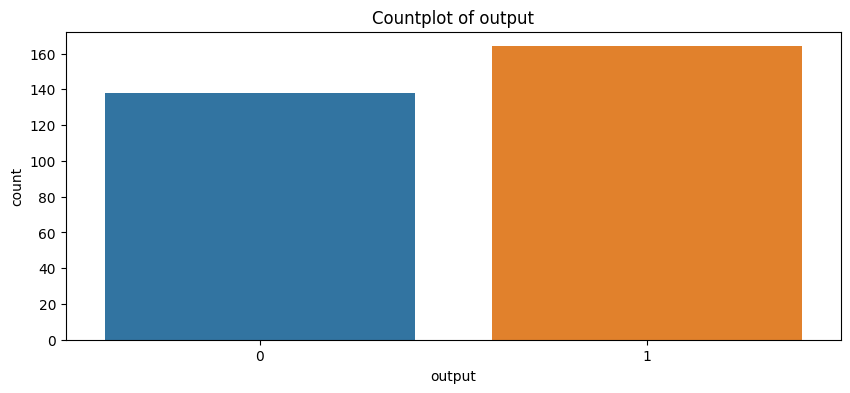

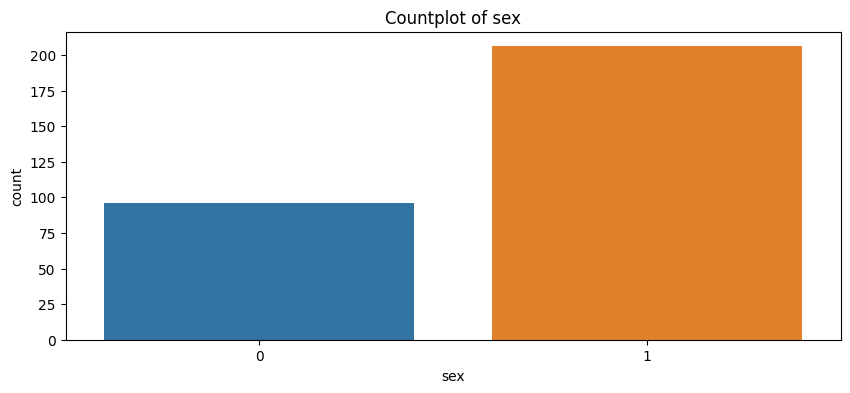

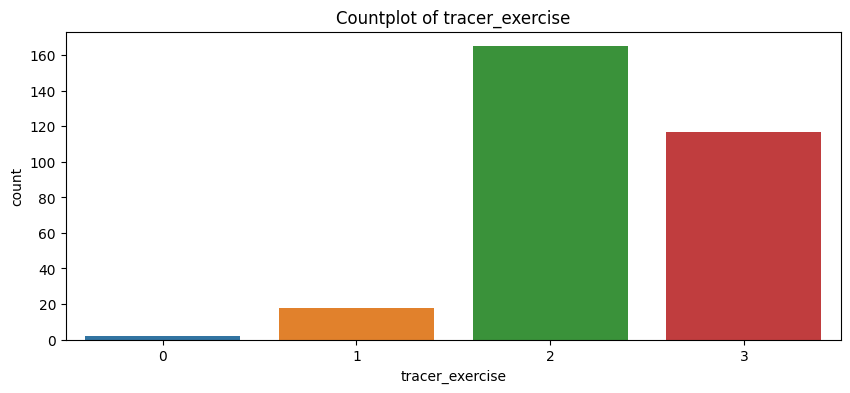

In [ ]:
continuous_vars = ['age', 'blood_pressure', 'cholesterol', 'max_heartrate', 'ecgdep_exercise']

# List of categorical variables which excludes the continuous variables
categorical_vars = df.columns.difference(continuous_vars)

# Plotting
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=var, data=df)
    plt.title(f'Countplot of {var}')
    plt.show()


It appears that patients with angina (chest pain) at rest represent the majority in our dataset. This is likely because this is the first sign that the patient notices that may be indicative of a problem. Most people do not get preventative testing of serum biomarkers or other more invasive testing.

The majority of patients are males, and half of the dataset has significant narrowing of a coronary vessel (output). Both ECG and tracer testing under stress conditions displays problems for most patients. Most patients do not have high glucose levels.

<br><br>
<br><br>

## 4.. Data Prediction

---



---

In this section we will use some models to make accurate predictions about the target variable output, described above. We will select models, check thier assumptions, adjust their hyperparameters and parameters, and evaluate their performance using cross-validation.

We have selected this method since we only have 302 samples, so the performance of the model may vary significantly depending on the random test-train split. By repeating this process k times we can obtain more reliable performance metrics, as well as maximising the size of our training dataset.

Our dataset is a mix of continious, binary and categorical data. This does not pose a problem for our model except in the case where the categorical feature (numeric type) does not possess ordinal characteristics when using a regression model. In this case, the feature will have to be one-hot encoded.




### 4.1 Preparing the model

---
Only the categorical variable "Exercise-Induced Ischemia (tracer_exercise)" is non-ordinal, as the categories for "Exercise-Induced ST-slope (ecgslope_exercise)", "Lesioned Coronary Vessels (coronary_lesions)", "Resting ECG Results (ecg_rest)" and "Chest Pain Type (angina_rest)" could be argued to be in order of severity.

As a result, we will have to one-shot encode "Exercise-Induced Ischemia (tracer_exercise)" and save the dataframe as x_encoded before running regression analysis. We will also save a non-encoded version called x.

To prepare the data before applying the models and evaluating using cross-validation, we are following the structure outlined below:

**1.- Building Matrices, x and y:** By creating both matrix x and y we are organizing the data and defining our target variable (the variable we want to predict, y) and the variables used to make those predictions (x)  

**2.- Applying Feature Scaling:** Standardization helps in ensuring that all features have the same scale and makes the model less sensitive to the magnitude of input variables.

In [ ]:
# 1. Splitting matrix
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# One-hot encode the "tracer_exercise" column
x_encoded = pd.get_dummies(x, columns=["tracer_exercise"], drop_first=True)

# 2. Feature scaling
# Store column names before scaling for x
x_columns = x.columns

# Store column names before scaling for x_encoded
x_encoded_columns = x_encoded.columns

scaler = StandardScaler()

x_encoded_scaled = scaler.fit_transform(x_encoded)
x_scaled = scaler.fit_transform(x)

# Convert the scaled arrays back to DataFrames
x_encoded = pd.DataFrame(x_encoded_scaled, columns=x_encoded_columns)
x = pd.DataFrame(x_scaled, columns=x_columns)



### 4.2 Factor Analysis of Mixed Data

---


In preparation for a logistic regression, we will explore which features often change together in the same direction (have colinearity) and may relate to a common underlying factor.
Before we do this, we must deal appropiately with features that are non-continuous (binary, categorical, string).

In order to deal with the categorical/binary data, we will perform the normalisation procedure outlined in the algorithm Factorial Analysis of Mixed Data (FAMD) before performing the PCA step. After standardising the features (converting to z-score so that each variable is given equal weight in analysis), we should perform the following steps for the categorical features:


1.   One-hot encode features
2.   Divide column by the square root of the probability
3.   Centre the columns

Thankfully, the prince package automatically handles this, so we only have to drop string columns.

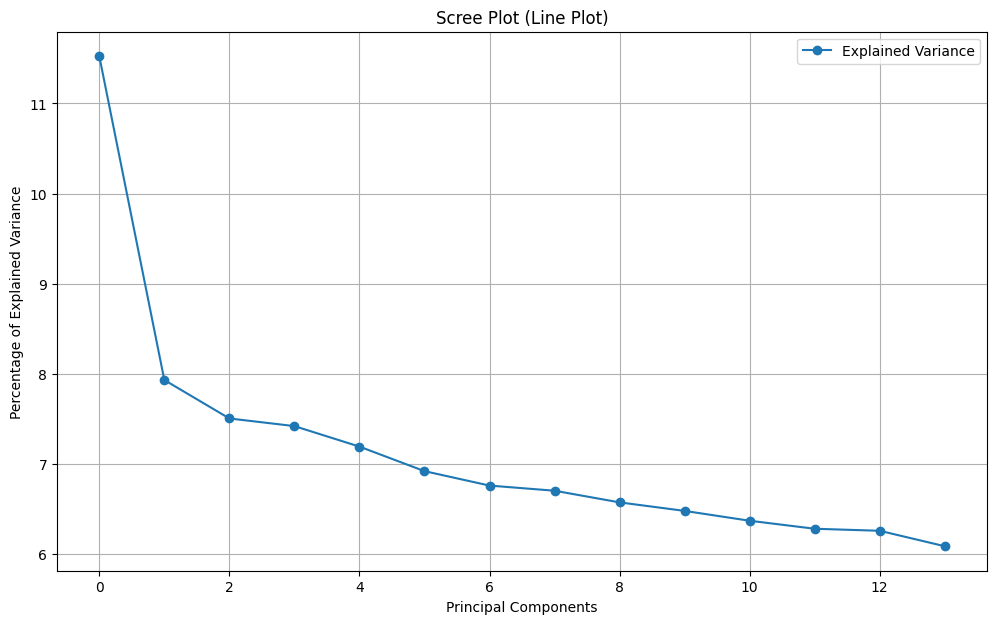

In [ ]:
df_pca = df.copy()

famd_nD = prince.FAMD(
    n_components=14,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit the FAMD object to your data
famd_nD = famd_nD.fit(df_pca)

# Extracting the coordinates in lower dimensional space
coordinates_nD = famd_nD.row_coordinates(df_pca)

# Calculate the variance of each principal component
variances_nD = coordinates_nD.var()

# Normalize the variances
normalized_variances_nD = variances_nD / variances_nD.sum()

# Convert proportions to percentages
normalized_variances_nD_percentage = normalized_variances_nD * 100

# Create a scree plot with percentage of explained variance
plt.figure(figsize=(12, 7))
plt.plot(normalized_variances_nD_percentage.index, normalized_variances_nD_percentage, marker='o', label='Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot (Line Plot)')
plt.grid(True)
plt.legend()
plt.show()





We can see that the first principal component explains a large part of the variance.

NameError: ignored

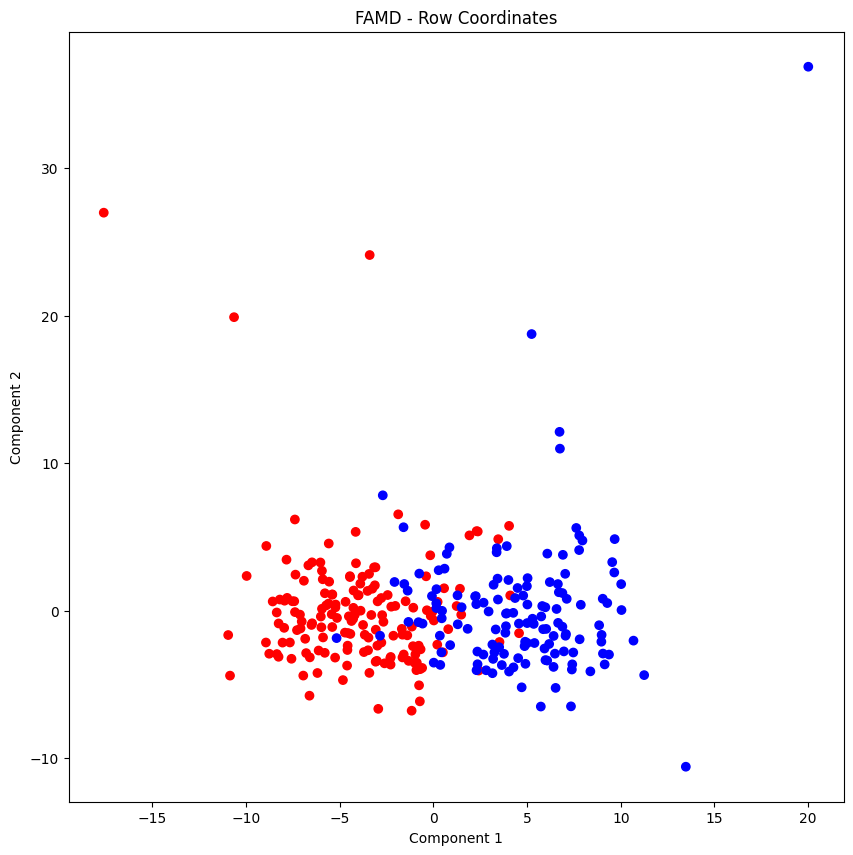

In [ ]:
# Performing FAMD
# Initialize the FAMD object
famd_2D = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"
)
famd_2D = famd_2D.fit(df_pca)

# Extracting the coordinates in lower dimensional space
coordinates_2D = famd_2D.row_coordinates(df_pca)

colors = df_pca['output'].map({0: 'blue', 1: 'red'})

# Create a scatter plot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(coordinates_2D[0], coordinates_2D[1], c=colors)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('FAMD - Row Coordinates')

# Create a legend
blue_patch = mpatches.Patch(color='blue', label='Output 0')
red_patch = mpatches.Patch(color='red', label='Output 1')
plt.legend(handles=[blue_patch, red_patch])

plt.show()

We can observe clear clustering of output positive (red) and output negative patients (blue). We can see that moving in the -x direction worsens results.

Lets see which variables contribute most to this.

In [ ]:
# Assuming `famd_2D` is your fitted FAMD object
column_coordinates = famd_2D.column_coordinates_

# Calculate the custom direction: -1*PC1
column_coordinates['custom_direction'] = -1 * column_coordinates[0]

# Sort by the custom direction
sorted_features = column_coordinates.sort_values(by='custom_direction', ascending=False)

# Now, `sorted_features` will contain your features sorted by their contribution to the custom direction -X
print(sorted_features)



component                 0         1  custom_direction
variable                                               
fasting_glucose    0.014538  0.000069         -0.014538
ecg_rest           0.069168  0.073499         -0.069168
sex                0.128433  0.002423         -0.128433
ecgdep_exercise    0.233957  0.004926         -0.233957
coronary_lesions   0.253898  0.023776         -0.253898
ecgslope_exercise  0.275790  0.010950         -0.275790
age                0.324789  0.424164         -0.324789
angina_exercise    0.335652  0.013023         -0.335652
blood_pressure     0.353780  0.653586         -0.353780
angina_rest        0.447667  0.069350         -0.447667
tracer_exercise    0.458960  0.214412         -0.458960
output             0.600428  0.000062         -0.600428
max_heartrate      0.641626  0.792382         -0.641626
cholesterol        0.744024  0.851973         -0.744024


We observe that cholesterol and max_heartrate contributes most to this effect.

In order to have better control on the amount of created clusters, an approach using a clustering method of KMeans has been devised. Furthermore, this method proves to be computationally less heavier than an agglomerative method like a dendogram.

An elbow curve and silhouette index based curve have been included in order to check first on the optimal amount of clusters for grouping. Following the silhouette criteria, we can see that the optimal value of clusters is that which maximizes locally the value of such index, where as in the elbow curve the main focus lies on inflection points.

### 4.3 Logistic Regression

---


We are attempting to predict the likelihood of a heart attack based on our various features.
In this context, a output value of 0 indicates a lower chance of a heart attack, while a output value of 1 indicates a higher chance.

Since a regression model assumes that all variables are ordinal, we will be using x_encoded as mentioned above. We will also have to check that colinearity is not excessive using variance inflation factor (VIF).

In [ ]:
# Calculate VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                       for i in range(data.shape[1])]
    return vif_data

print("VIF values:")
print(calculate_vif(x_encoded))
print()

VIF values:
    Variable        VIF
0        age   1.444376
1        sex   1.305186
2     trtbps   1.187725
3       chol   1.151033
4        fbs   1.100610
5         cp   1.311271
6    restecg   1.064192
7        caa   1.209671
8   thalachh   1.635902
9       exng   1.411802
10       slp   1.687938
11   oldpeak   1.712045
12   thall_1   9.691811
13   thall_2  38.920292
14   thall_3  37.803234



It seems we have a similar number of each. In order to reduce the risk of overfitting, we will use lasso to perform feature selection.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression(penalty='l1', solver='saga', C=0.3, max_iter=1000)

# Assuming x_encoded and y are already defined and properly preprocessed
cv_results = cross_validate(model, x_encoded, y, cv=10, return_train_score=True)

train_scores = cv_results['train_score']
validation_scores = cv_results['test_score']

print("Train scores for each fold: ", train_scores)
print("Validation scores for each fold: ", validation_scores)
print("Average train score: {:.2f}%".format(train_scores.mean() * 100))
print("Average validation score: {:.2f}%".format(validation_scores.mean() * 100))


Train scores for each fold:  [0.86346863 0.87822878 0.86029412 0.85294118 0.86029412 0.86397059
 0.86764706 0.86397059 0.87132353 0.86397059]
Validation scores for each fold:  [0.90322581 0.83870968 0.86666667 0.93333333 0.86666667 0.76666667
 0.9        0.8        0.73333333 0.76666667]
Average train score: 86.46%
Average validation score: 83.75%


We can see that our model achieves a classification performance of 83.75%. We can indeed see that our performance changes substantially depending on which samples are randomly selected and that cross-validation improves reliability. Note that alterting regularisation strength has a small effect on the model and we have refrained from precisely optimising it since we dont have a test set to observe how this generalises.

<br><br>
### 4.4 Gaussian Naive Bayes

---


We now apply a Gaussian Naive Bayes model and here are some reasons why. First, this is a simple type model such as logistic regression, so it is a great way to compare the results of logistic regression with another model. Second, logistic regression can be sensitive to outliers whereas, Gaussian Naive Bayes relies on summary statistics like mean and variance so, can be less affected by extreme values. Finally, this type of model works well, even with limited data.

Keep in mind that this model assumes we are using continious variables with normal distributions, which may not apply for our categorical variables. Nonetheless, lets proceed with our analysis.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

nb_model = GaussianNB()

# Assuming x and y are already defined and properly preprocessed
cv_results = cross_validate(nb_model, x, y, cv=10, return_train_score=True)

train_scores = cv_results['train_score']
validation_scores = cv_results['test_score']

for i, (train_score, validation_score) in enumerate(zip(train_scores, validation_scores), 1):
    print(f"Fold {i}:")
    print(f"  Train Accuracy: {train_score*100:.2f}%")
    print(f"  Validation Accuracy: {validation_score*100:.2f}%\n")

average_train_accuracy = train_scores.mean() * 100
average_validation_accuracy = validation_scores.mean() * 100

print(f"Average train accuracy: {average_train_accuracy:.2f}%")
print(f"Average validation accuracy: {average_validation_accuracy:.2f}%")



Fold 1:
  Train Accuracy: 84.13%
  Validation Accuracy: 80.65%

Fold 2:
  Train Accuracy: 83.03%
  Validation Accuracy: 80.65%

Fold 3:
  Train Accuracy: 82.72%
  Validation Accuracy: 86.67%

Fold 4:
  Train Accuracy: 84.19%
  Validation Accuracy: 90.00%

Fold 5:
  Train Accuracy: 84.19%
  Validation Accuracy: 80.00%

Fold 6:
  Train Accuracy: 84.19%
  Validation Accuracy: 73.33%

Fold 7:
  Train Accuracy: 82.35%
  Validation Accuracy: 90.00%

Fold 8:
  Train Accuracy: 84.93%
  Validation Accuracy: 80.00%

Fold 9:
  Train Accuracy: 84.93%
  Validation Accuracy: 73.33%

Fold 10:
  Train Accuracy: 85.66%
  Validation Accuracy: 73.33%

Average train accuracy: 84.03%
Average validation accuracy: 80.80%


Comparng the accuracy of both models, logistic regression and Gaussian Navie Bayes we can observe that the result are pretty similar, it suggests that both models are performing similarly in terms of the overall correctness of ther predictions. Then, if we want to increase the accuracy of the predictions we need to apply a more complex model.

<br><br>
### 4.5 Support Vector Machine (SVM)

---




Support Vector Machine is a popular choice for many classification tasks such as ours. There are 3 main points worth mentioning. First of all, SVMs are less sensitive to outliers in the data. They focus on the support vectors, which are the data points that are closest to the decision boundary. Furthermore, SVMs often have strong generalization performance, meaning they can make accurate predictions on new, unseen data. And finally, SVMs inherently provide a form of regularization, which helps prevent overfitting

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # Only used if kernel is 'poly'
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Create an SVM model
model = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1, return_train_score=True)

# Assuming x_encoded and y are already defined and properly preprocessed
grid_search.fit(x_encoded, y)

# Print the best parameters and their corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_ * 100, "%")

# Retrieve the training and test scores for each fold of the best estimator
cv_results = grid_search.cv_results_
best_index = grid_search.best_index_
train_scores = cv_results['mean_train_score'][best_index]
test_scores = cv_results['mean_test_score'][best_index]

print(f"Training accuracy for the best model: {train_scores*100:.2f}%")
print(f"Validation accuracy for the best model: {test_scores*100:.2f}%")



Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best parameters found: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validated accuracy: 84.77419354838712 %
Training accuracy for the best model: 82.78%
Validation accuracy for the best model: 84.77%


Lets graph it.

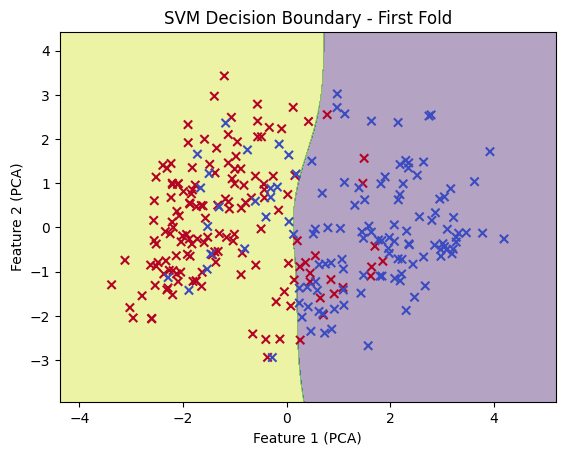

In [ ]:
n_splits = 10  # For 10-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Get the first train-test split
train_index, test_index = next(kf.split(x_encoded, y))

x_train_fold, x_test_fold = x_encoded.iloc[train_index], x_encoded.iloc[test_index]
y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

if x_train_fold.shape[1] > 2:
    pca = PCA(n_components=2)
    x_train_pca = pca.fit_transform(x_train_fold)
    x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
    y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
else:
    x_train_pca = x_train_fold
    x_min, x_max = x_train_fold[:, 0].min() - 1, x_train_fold[:, 0].max() + 1
    y_min, y_max = x_train_fold[:, 1].min() - 1, x_train_fold[:, 1].max() + 1

# Train the model
model.fit(x_train_pca, y_train_fold)

# Create a meshgrid of points to evaluate the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_fold, cmap=plt.cm.coolwarm, marker='x')
plt.xlabel('Feature 1 (PCA)' if x_train_fold.shape[1] > 2 else 'Feature 1')
plt.ylabel('Feature 2 (PCA)' if x_train_fold.shape[1] > 2 else 'Feature 2')
plt.title('SVM Decision Boundary - First Fold')
plt.show()



### 4.6 Random Forest

---

Choosing a Random Forest model is a great idea when searching for a model with robustness to overfitting, making it suitable for datasets with noisy or ubalanced data. Random Forest can model complex relationships between features and target variables. They are capable of capturing both lineal and non-lineal relationships, very suitable for binary problems.

This case is analogous to the Decision Tree model definition, however the "tuned_parameter" variable has been modified to fit this kind of analysis.

Random Forests, even though more complex -and therefore slow to compute-, are able to avoid overfitting better than Decision Trees, as the former treat all features equally, while a Decision Tree only takes into account features that split data in the most optimal way. At the end of the day, Random Forests are multiple Decision Trees combined, but this doesn't necessarily mean that automatically the RF models will be better than DT.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForest classifier
rf = RandomForestClassifier(random_state=0)

# Set up GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_encoded, y)

# Print the best parameters and their corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_ * 100, "%")



Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best parameters found: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validated accuracy: 84.73118279569893 %


### 4.7 K-Nearest Neighbors (KNN)

---

K-Nearest Neighbors (KNN) is a simple, interpretable, and versatile algorithm suitable for various scenarios. It excels with small to medium-sized datasets, doesn't make strong distribution assumptions, and can capture local patterns. However, it may be computationally expensive with large datasets and sensitive to the curse of dimensionality. KNN can serve as a baseline model and is effective when data similarity is essential.

The purpose is to determine the 'k' value that minimizes the error rate, which is the proportion of misclassified instances. This is important because the choice of 'k' can significantly impact the accuracy and generalization of the KNN model. The code visualizes the relationship between 'k' and the error rate to help select the most suitable 'k' for the specific problem, ultimately improving the model's performance.

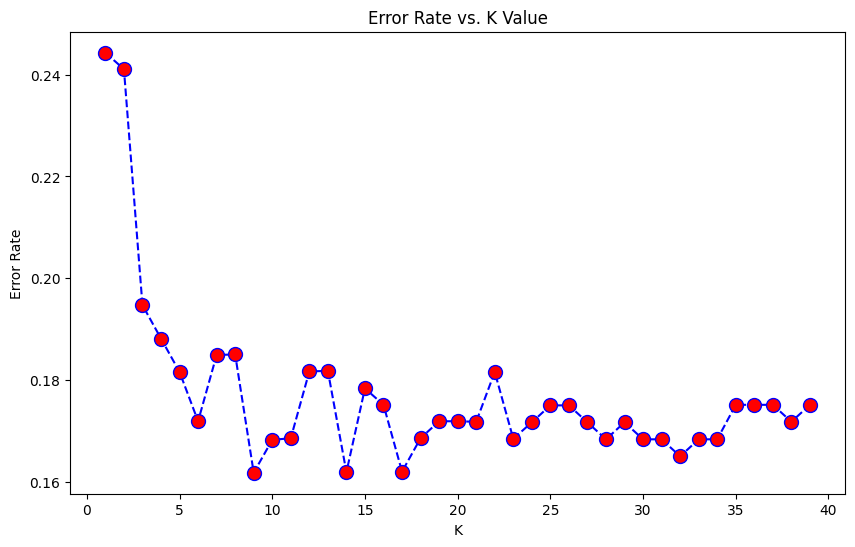

In [ ]:
error_rate = []

# Use 10-fold cross-validation
cv_folds = 10

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    # Compute cross-validated accuracy scores
    scores = cross_val_score(model, x, y, cv=cv_folds, scoring='accuracy')
    # Convert accuracy scores to error rate
    error_rate.append(1 - np.mean(scores))

# Plotting the error rate vs. K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

We can see that past a K of around 10, the performance of the model plateaus. Lets optimise the model systematically using grid search.

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters found: {'n_neighbors': 22, 'p': 2}
Best cross-validated accuracy: 83.81420765027323 %


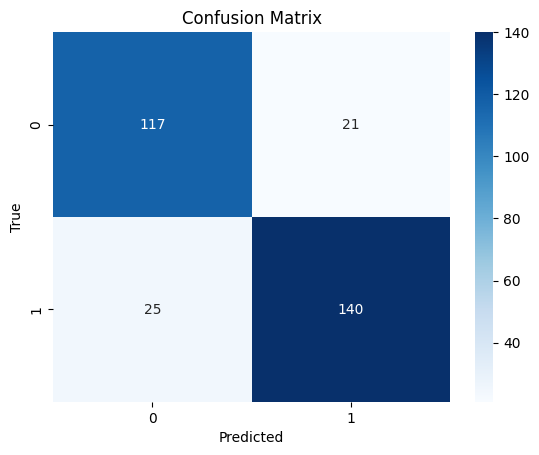

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': list(range(1, 31)),  # Checking for 1 to 30 neighbors
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_encoded, y)

# Print the best parameters and their corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_ * 100, "%")

# Use the best model to make predictions on the test set
best_knn = grid_search.best_estimator_
predicted = best_knn.predict(x_encoded)

# Confusion matrix
cm = confusion_matrix(y, predicted)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The choice of the value of k in KNN can significantly impact the model's performance. In this case, selecting an optimal value of k (k=7) led to a higher accuracy compared to the initial k=1.

The error rate analysis showed that there is a sweet spot for the choice of k, balancing bias and variance. Too small k values can lead to overfitting, while too large k values can lead to underfitting.

KNN is a versatile and easy-to-understand classification algorithm that can be fine-tuned for better performance. The choice of k should be based on your specific dataset and problem.

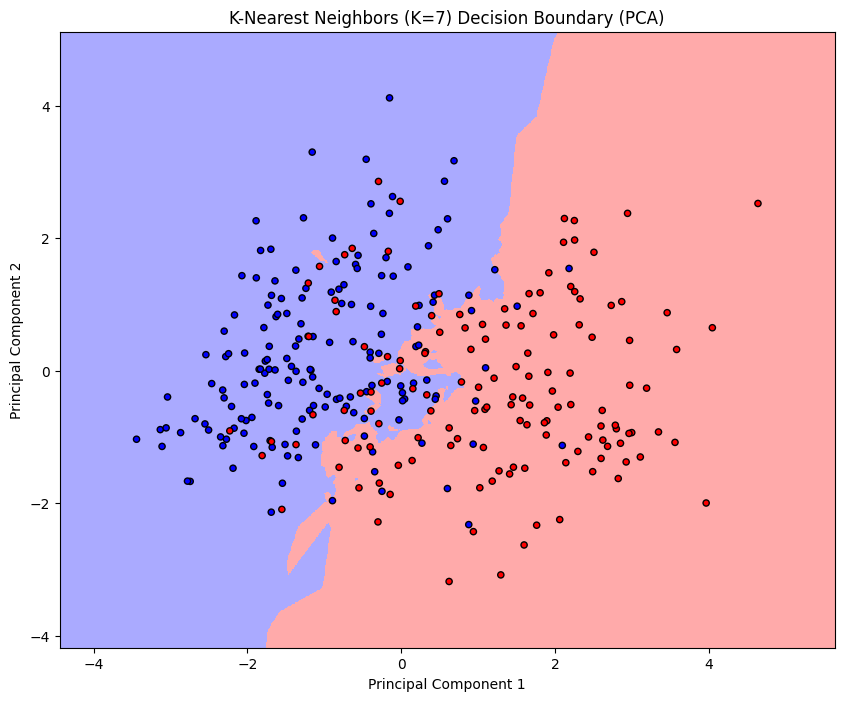

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Fit the KNN model on the reduced 2D dataset
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_pca, y)

# Create a meshgrid for the decision boundary
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class using the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF']) # Adjust the colors for your dataset
cmap_bold = ListedColormap(['#FF0000', '#0000FF']) # Adjust the colors for your dataset

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto') # Use shading='auto' to avoid deprecation warning
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-Nearest Neighbors (K=7) Decision Boundary (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

### 4.8 Neural Network

---

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming x is your input features and y is the labels
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(x, y):
    # Define the model architecture
    model = Sequential([
        Dense(64, input_shape=(x.shape[1],), activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Fit the model
    model.fit(x.iloc[train], y.iloc[train], batch_size=32, epochs=50, verbose=0)

    # Evaluate the model on the test data
    scores = model.evaluate(x.iloc[test], y.iloc[test], verbose=0)

    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Score for fold 1: loss of 0.44617313146591187; accuracy of 80.32786846160889%
Score for fold 2: loss of 0.4241879880428314; accuracy of 81.96721076965332%
Score for fold 3: loss of 0.30033060908317566; accuracy of 86.66666746139526%
Score for fold 4: loss of 0.5158426761627197; accuracy of 80.0000011920929%
Score for fold 5: loss of 0.46775922179222107; accuracy of 81.66666626930237%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.44617313146591187 - Accuracy: 80.32786846160889%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.4241879880428314 - Accuracy: 81.96721076965332%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.30033060908317566 - Accuracy: 86.66666746139526%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.51584267616

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold


# Hyperparameter sets to try
neurons_options = [10, 20, 50]
learning_rate_options = [0.001, 0.01, 0.1]

# K-Fold Cross Validation model evaluation
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

best_score = 0
best_params = {}
fold_no = 1
fold_variations = {
    'train_loss': [],
    'val_loss': [],
    'train_acc': [],
    'val_acc': []
}

for neurons in neurons_options:
    for learning_rate in learning_rate_options:
        fold_scores = []
        for train, test in kfold.split(x, y):
            # Define the model
            model = Sequential([
                Dense(neurons, input_shape=(x.shape[1],), activation='relu'),
                Dense(1, activation='sigmoid')
            ])

            # Compile the model
            model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

            # Fit the model
            history = model.fit(x.iloc[train], y.iloc[train], epochs=50, batch_size=10, verbose=0, validation_data=(x.iloc[test], y.iloc[test]))

            # Store the history in the fold_variations dict
            fold_variations['train_loss'].append(history.history['loss'])
            fold_variations['val_loss'].append(history.history['val_loss'])
            fold_variations['train_acc'].append(history.history['accuracy'])
            fold_variations['val_acc'].append(history.history['val_accuracy'])

            # Evaluate the model
            scores = model.evaluate(x.iloc[test], y.iloc[test], verbose=0)
            fold_scores.append(scores[1] * 100)  # Append accuracy
            fold_no += 1

        # Compute the average score across all folds
        average_score = np.mean(fold_scores)
        if average_score > best_score:
            best_score = average_score
            best_params = {'neurons': neurons, 'learning_rate': learning_rate}

        # Reset the fold counter
        fold_no = 1

# Print out the best hyperparameters
print(f'Best score: {best_score}%')
print(f'Best hyperparameters: {best_params}')

Best score: 85.11475324630737%
Best hyperparameters: {'neurons': 50, 'learning_rate': 0.001}


We can see that the optimised model has achieved an ROC AUC performance of 84.4%. This model has 10 neurons and a learning rate of 0.001.

Lets see the influence of epoches (number of times the model is trained on the same sample) on model performance. We aim to find the inflection point.

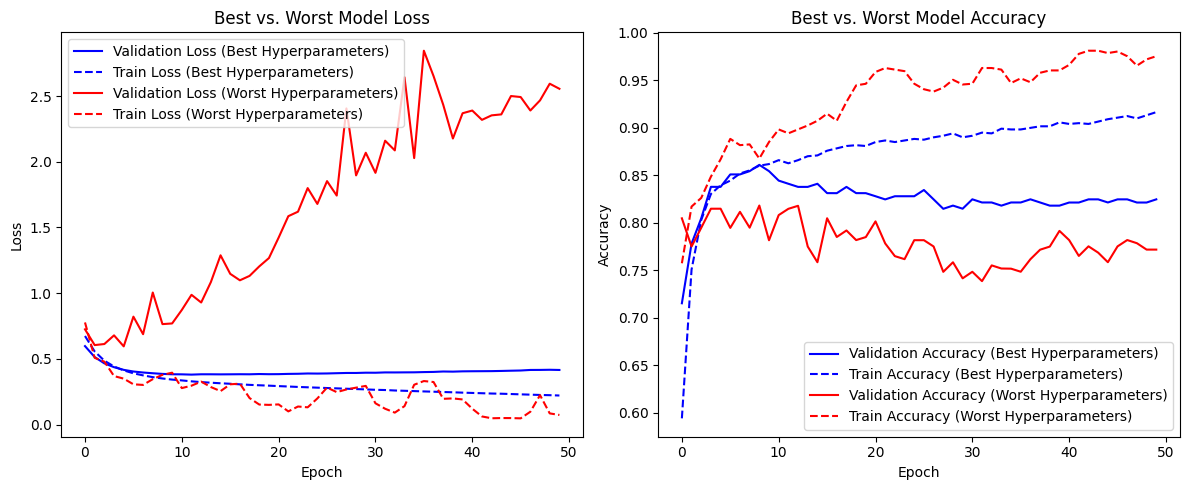

In [ ]:
# Calculate the average performance for each hyperparameter combination across all folds
average_performances = []
for i in range(0, len(fold_variations['val_acc']), num_folds):
    avg_val_acc = np.mean([fold_variations['val_acc'][j] for j in range(i, i + num_folds)])
    average_performances.append({
        'index': i // num_folds,
        'avg_val_acc': avg_val_acc,
        'train_loss': np.mean([fold_variations['train_loss'][j] for j in range(i, i + num_folds)], axis=0),
        'val_loss': np.mean([fold_variations['val_loss'][j] for j in range(i, i + num_folds)], axis=0),
        'train_acc': np.mean([fold_variations['train_acc'][j] for j in range(i, i + num_folds)], axis=0),
        'val_acc': np.mean([fold_variations['val_acc'][j] for j in range(i, i + num_folds)], axis=0),
    })

# Sort the performances by average validation accuracy
sorted_performances = sorted(average_performances, key=lambda x: x['avg_val_acc'])

# Select the highest and lowest performing hyperparameter indexes
highest_performance = sorted_performances[-1]  # Last item after sorting
lowest_performance = sorted_performances[0]  # First item after sorting

# Plot the learning curves for the highest and lowest performing models
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(highest_performance['val_loss'], label='Validation Loss (Best Hyperparameters)', color='blue')
plt.plot(highest_performance['train_loss'], label='Train Loss (Best Hyperparameters)', color='blue', linestyle='--')
plt.plot(lowest_performance['val_loss'], label='Validation Loss (Worst Hyperparameters)', color='red')
plt.plot(lowest_performance['train_loss'], label='Train Loss (Worst Hyperparameters)', color='red', linestyle='--')
plt.title('Best vs. Worst Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(highest_performance['val_acc'], label='Validation Accuracy (Best Hyperparameters)', color='blue')
plt.plot(highest_performance['train_acc'], label='Train Accuracy (Best Hyperparameters)', color='blue', linestyle='--')
plt.plot(lowest_performance['val_acc'], label='Validation Accuracy (Worst Hyperparameters)', color='red')
plt.plot(lowest_performance['train_acc'], label='Train Accuracy (Worst Hyperparameters)', color='red', linestyle='--')
plt.title('Best vs. Worst Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()



We can make a few interesting observations here. As expected, train performance (dashed) is higher than validation performance (solid). This is especially evident in the worst model which has overfitted the data, with the highest train performance but lowest validation performance. In general, more passes over the dataset continues to drive up train performance while test performance peaks at around 8 epochs. Past this point, continued training just increases overfitting without increasing ability to generalise to new data.

### 4.9 Model ROC Comparison

Finally, we aim to compare our models by plotting their receiver operating characteristics in order to compare their performance.

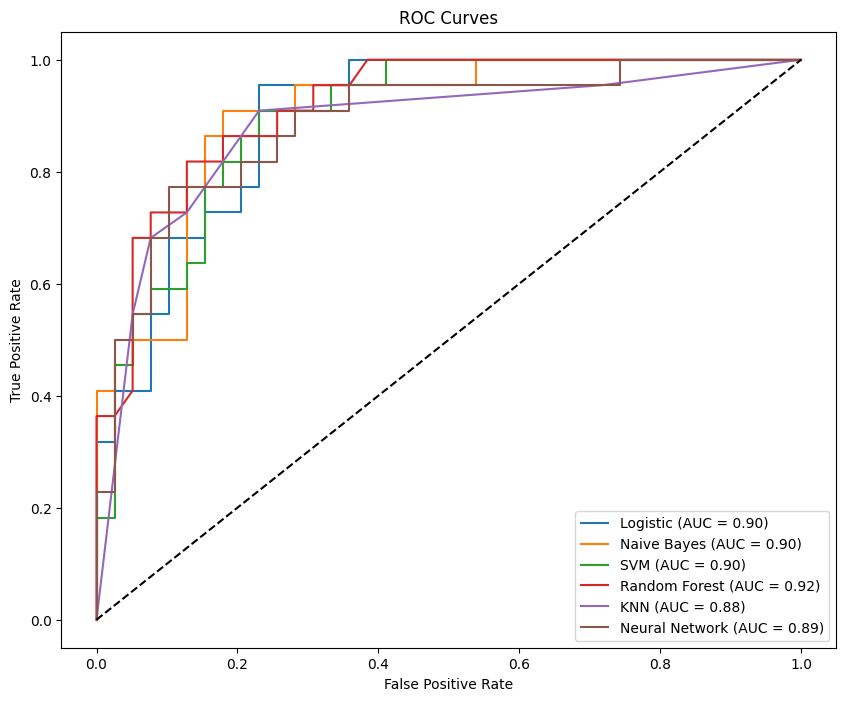

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

# Train each classifier and predict probabilities on the test set
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_probs = logistic_model.predict_proba(x_test)[:, 1]

# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_probs = nb_model.predict_proba(x_test)[:, 1]

# Support Vector Machine (probability estimates are not available by default, so we enable them)
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)
svm_probs = svm_model.predict_proba(x_test)[:, 1]

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_probs = rf_model.predict_proba(x_test)[:, 1]

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_probs = knn_model.predict_proba(x_test)[:, 1]

# Neural Network
nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(x_train, y_train)
nn_probs = nn_model.predict_proba(x_test)[:, 1]

# Calculate FPR and TPR for each model
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)

# Calculate the AUC for each model
logistic_roc_auc = roc_auc_score(y_test, logistic_probs)
nb_roc_auc = roc_auc_score(y_test, nb_probs)
svm_roc_auc = roc_auc_score(y_test, svm_probs)
rf_roc_auc = roc_auc_score(y_test, rf_probs)
knn_roc_auc = roc_auc_score(y_test, knn_probs)
nn_roc_auc = roc_auc_score(y_test, nn_probs)

# Plot the ROC curve for each model
plt.figure(figsize=(10, 8))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic (AUC = {logistic_roc_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_roc_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


As we can observe, all models have a very similar performance with a balanced sensitivity and selectivity. Please note that the models used have trained using a classic train-test split and have not had their hyperparameters optimised. This is in an attempt to keep computational requirements under control. Nonetheless, the results are very similar to those found in the previous sections.

<br><br>
<br><br>
## 5.. Conclusion



After cleaning, we emerged with 303 samples and 14 features which were analysed with an emphasis on wheater the patien has a high or lower chance of a heart attack (our outcome variable).

Assuming we can trust the data's quality:

First, the results of the logistic regression with cross-validation suggest that the model achieves an average accuracy of approximately 83.14%. This indicates that, on average, the model can make correct predictions for the desired outcome in roughly 83.14% of cases. Several factors may be influencing our results, including the limited amount of data and the model's simplicity. Due to the straightforward nature of logistic regression, it may not capture all the nuances in the data.

Second, with the best hyperparameters in place, the Gaussian Naive Bayes model demonstrates consistent performance with an average training accuracy of 84.03% and an average validation accuracy of 80.80% across 10-fold cross-validation.

Third, the results indicate that the best hyperparameters for our SVM model were:

Regularization parameter 'C': 0.1
Kernel function: Linear
Polynomial degree: 2 (only used if the kernel is 'poly')
Gamma: 'scale'
The best cross-validated accuracy achieved with these hyperparameters was 84.16%.

This means that, after experimenting with different combinations of hyperparameters from our parameter grid, the combination mentioned above yielded the highest accuracy when performing 10-fold cross-validation on our dataset.

These hyperparameters suggest that a linear SVM with relatively low regularization ('C' value of 0.1) and a linear kernel performed best for our specific dataset and classification task. The choice of a low 'C' value implies a preference for a wider margin (greater generalization) with some tolerance for misclassifications.

Overall, these hyperparameters represent the model's best trade-off between bias and variance in our specific problem, resulting in an 84.16% cross-validated accuracy.

Fourth, in the Random Forest classifier, the best combination of hyperparameters for the Random Forest model has been determined, including not using bootstrap, having no maximum depth constraint ('max_depth': None), 'max_features' set to 'auto', 'min_samples_leaf' of 4, 'min_samples_split' of 2, and using 200 estimators ('n_estimators': 200).

With these hyperparameters, the Random Forest model demonstrated a cross-validated accuracy of approximately 84.73%. This accuracy signifies the model's ability to effectively classify instances within our dataset.

Fifth, in the K-Nearest Neighbors (KNN) classifier the best hyperparameters for the KNN model were determined to be 22 neighbors and the use of Euclidean distance (p=2). With these settings, the KNN model achieved a cross-validated accuracy of approximately 83.81%.

Additionally, the model's performance was evaluated using a confusion matrix, providing insights into its ability to correctly classify instances. These results demonstrate the effectiveness of the KNN classifier in this specific classification task.

Finally, in neural networking, the outcome highlighted that the configuration with 50 neurons in the hidden layer and a learning rate of 0.001 yielded the best results, achieving an average accuracy of approximately 85.11%. Accuracy served as the primary metric for model selection.

By utilizing 5-fold cross-validation, we enhanced the model's robustness and demonstrated that the chosen hyperparameters are likely to perform consistently well in practical scenarios.

In summary, this model delivers an optimized neural network for binary classification, offering valuable insights into hyperparameter tuning. The identified hyperparameters, 50 neurons and a learning rate of 0.001, form a strong foundation for further model development and deployment. This approach can serve as a valuable reference for similar machine learning endeavors.

In conclusion, both the Random Forest and neural network models emerge as the leading performers, boasting highly accurate predictions for heart attacks with their meticulously tuned configurations and hyperparameters. When making the choice between these models, factors like computational resources and interpretability come into play. However, it's worth highlighting that, in practice, these models showcase remarkably similar performance, with only minor variations distinguishing them. The Gaussian Naive Bayes model, on the other hand, stands as an exception due to its slightly lower accuracy score.

## 6.. Bibliography
<br>

[1] UC Irvine Heart Disease Dataset - https://archive.ics.uci.edu/dataset/45/heart+disease



[2] Libby, P. (2021). The changing landscape of atherosclerosis. Nature, 592(7855), 524-533.


[3] Scipy sklearn library - https://scikit-learn.org/stable/

[4] Plotly library - https://plotly.com/python/

[5] Folium library - https://python-visualization.github.io/folium/latest/

[6] Brance library - https://pypi.org/project/branca/

[7] Geopy library - https://geopy.readthedocs.io/en/stable/

[8] Prince library - https://github.com/MaxHalford/prince

[9] Gower library - https://pypi.org/project/gower/